# Final Year Project - Intelligent Health Monitoring System
#### by: Koo Chia Meng, A0165275Y

### DATA EXPLORATION (VERSION 2):

### TREND VISUALISATION AND ANALYSIS - PERSON 2

In [1]:
#Import relevant Dependencies

import datetime
import time
import pandas as pd # Pandas Version 1.0.5
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats as sps
import sklearn.linear_model as lm
import seaborn as sns # use for visualising
import os

In [2]:
%run FYP_SUBJECTS_CLASS.ipynb # line needed to reuse the SUBJECT class created for OOP

### Loading Subjects from PICKLE

In [3]:
current_directory = os.getcwd()
folder = "PERSON2" # CHANGE HERE
file = "PERSON2_DATA_31JUL.pickle" # CHANGE HERE
f_path = os.path.join(current_directory,folder,file)
                      
with open(f_path,'rb') as f:
    PERSON2 = pickle.load(file=f)

In [4]:
PERSON2.profile

{'age': 27, 'gender': 'MALE', 'height': 176.0, 'weight': 65.0}

### Loading Previously Processed DFs from PICKLE

In [5]:
## current_directory = os.getcwd()
folder = os.path.join("PERSON2","31JUL") # CHANGE HERE
folder_path = os.path.join(current_directory,folder)


In [6]:
# LOAD FROM PICKLE:

unpickle = {}
unpickle_list = [
                # Daily Resting Heart Rate DF:
                'df_resting_hr',

                # Daily Heart Rate Zones (HR Activities) DF:
                'df_hr_calories',

                # Intra-day Heart Rate DF:
                'df_intraday_hr',

                # Sleep Durations DF
                'df_sleep_durations',

                # Detailed intra Sleep Stages DF
                'df_intra_sleep_stage',

                # Daily Step activities DF:
                'df_activity_steps',
    
                # Derived HRV Stats DFs:
                'df_hrv_stats_full_day',
                'df_hrv_stats_AM',
                'df_hrv_stats_PM'
]

for i in unpickle_list:
    file = os.path.join(folder_path, str(i) + '.pickle')
    with open(file,'rb') as f:
        unpickle[i] = pickle.load(file=f)

PERSON2.df_resting_hr = unpickle['df_resting_hr']
PERSON2.df_hr_calories = unpickle['df_hr_calories']
PERSON2.df_intraday_hr = unpickle['df_intraday_hr']
PERSON2.df_sleep_durations = unpickle['df_sleep_durations']
PERSON2.df_intra_sleep_stage = unpickle['df_intra_sleep_stage']
PERSON2.df_activity_steps = unpickle['df_activity_steps']
PERSON2.df_hrv_stats_full_day = unpickle['df_hrv_stats_full_day']
PERSON2.df_hrv_stats_AM = unpickle['df_hrv_stats_AM']
PERSON2.df_hrv_stats_PM = unpickle['df_hrv_stats_PM']

### Plotting the DFs just by itself
Before comparing the different DFs with each other, it might be worthwhile to visualise individual DFs by itself. We can also see how the data itself looked like in time series before comparison.

#### Calories Recorded by Heart Rate Activities and Duration in Heart Rate Zones

In [7]:
PERSON2.df_hr_calories

,Total_caloriesOut,minutes_Regular,minutes_Fatburn,minutes_Cardio,minutes_Peak,Total_minutes
dateTime,,,,,,
2020-04-06,1500.0572,533.0,66.0,19.0,1.0,619.0
2020-04-07,1409.0764,678.0,14.0,0.0,0.0,692.0
2020-04-08,2292.8738,1145.0,62.0,13.0,0.0,1220.0
2020-04-09,1678.3030,1027.0,16.0,0.0,0.0,1043.0
2020-04-16,1119.2440,626.0,22.0,17.0,0.0,665.0
...,...,...,...,...,...,...
2020-07-26,2311.9032,1358.0,40.0,0.0,0.0,1398.0
2020-07-27,2128.7030,1192.0,43.0,1.0,0.0,1236.0
2020-07-28,2025.1110,1337.0,7.0,0.0,0.0,1344.0


### Splitting the data into months

In [8]:
PERSON2.df_hr_calories.index = pd.to_datetime(PERSON2.df_hr_calories.index) # Changing to DateTime index

In [9]:
PERSON2.df_hr_calories['month'] = PERSON2.df_hr_calories.index.month_name() # adding a column for month
PERSON2.df_hr_calories['m_num'] = PERSON2.df_hr_calories.index.month

In [10]:
# Splitting into data into dictionary of months:

month_list = list(PERSON2.df_hr_calories.month.unique())
col = [x for x in PERSON2.df_hr_calories.columns if 'total' not in x.lower() and 'm_num' not in x.lower()]

PERSON2.TotalCal = {}
PERSON2.HR_Zones = {} 

for mm in month_list:
    PERSON2.TotalCal[mm] = PERSON2.df_hr_calories['2020-' + mm].Total_caloriesOut
    PERSON2.HR_Zones[mm] = PERSON2.df_hr_calories.loc['2020-' + mm , col]

In [11]:
# Viewing the Number of records for each month:

PERSON2.df_hr_calories.groupby('month').count()

,Total_caloriesOut,minutes_Regular,minutes_Fatburn,minutes_Cardio,minutes_Peak,Total_minutes,m_num
month,,,,,,,
April,10,10,10,10,10,10,10
July,24,24,24,24,24,24,24
June,23,23,23,23,23,23,23
May,12,12,12,12,12,12,12


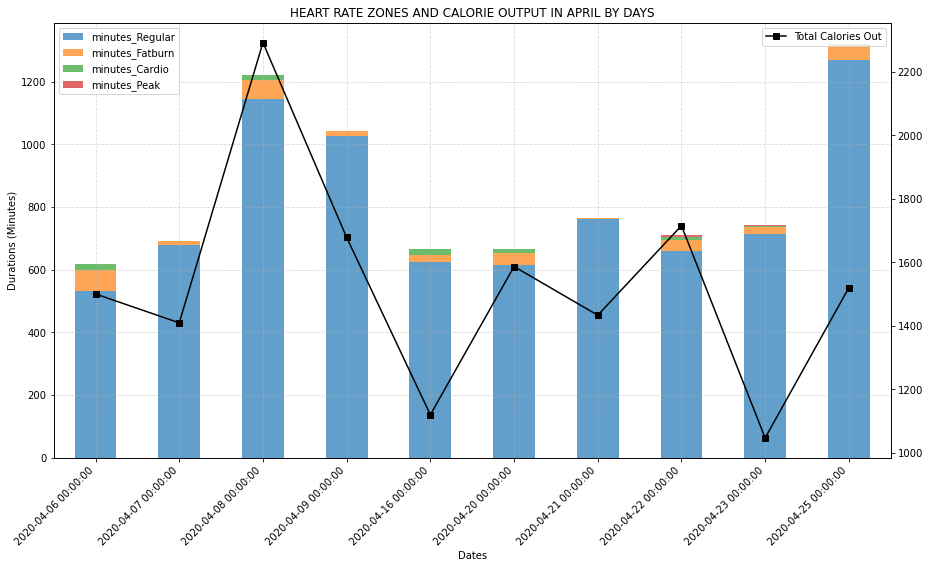

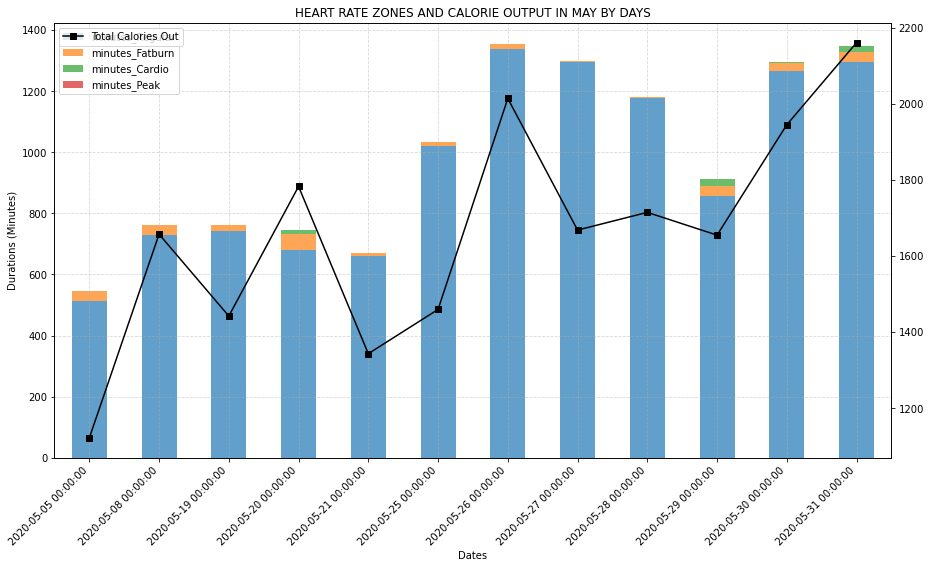

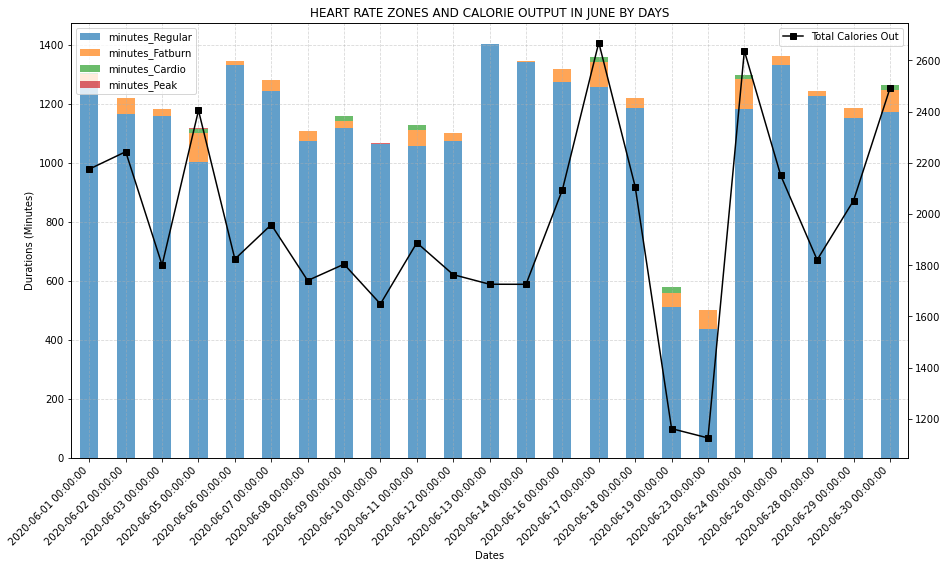

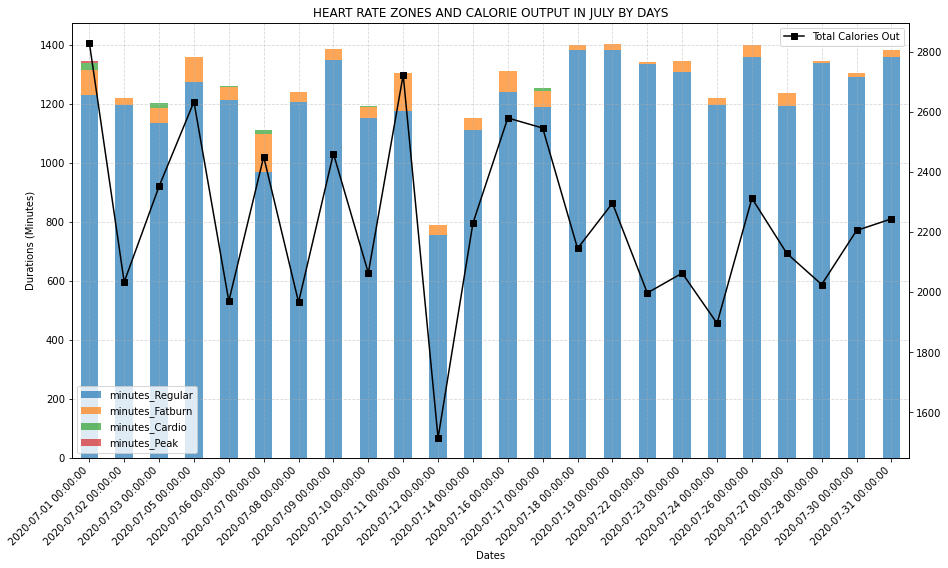

In [12]:
# Plotting using df.plot() splitting into months

for mm in month_list:
    
    PERSON2.HR_Zones[mm].plot(figsize=(15,8),kind='bar',stacked=True,alpha=0.7)

    plt.grid(True,alpha=0.5,ls='--')
    plt.title('HEART RATE ZONES AND CALORIE OUTPUT IN '+ mm.upper() + ' BY DAYS')
    plt.xticks(rotation=45,ha='right')
    plt.xlabel('Dates')
    plt.ylabel('Durations (Minutes)')

    ax2 = plt.twinx()
    ax2.plot(PERSON2.TotalCal[mm].values,'s-k',label='Total Calories Out')
    plt.legend()

    plt.show()

From the above plot:
1. the duration in the regular HR zone, makes up of the majority of the total calorie output.
2. the intensity of the day's activity is shown by the amount of time in different levels of HR zones.
    - "minutes_Peak" is the least, followed by "minutes_Cardio" and "minutes_Fatburn".
    - The days of exercise are shown in the peaks of the "minutes_Cardio" and "minutes_peak" plot
3. Calories will increase when the duration increases in HR zones above "Regular".
4. The records might not be from a full day (total durations less then 600 minutes or 10 Hours), which caused the dips.

#### Distribution of the HR Zone Durations and Calories

Overall Distribution:

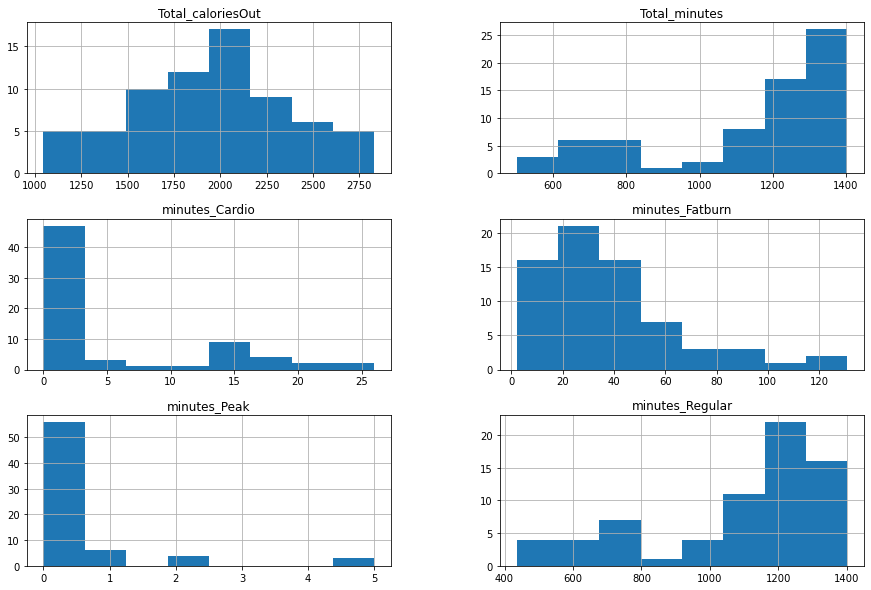

In [13]:
col = [x for x in PERSON2.df_hr_calories.columns if 'minutes' in x.lower() or 'total' in x.lower()]
PERSON2.df_hr_calories[col].hist(bins=8,figsize=(15,10))
plt.show()

The distribution of the Total Calories output is like a normal distribution, and probably averages at 2000.

Total Calories Distribution in individual months:

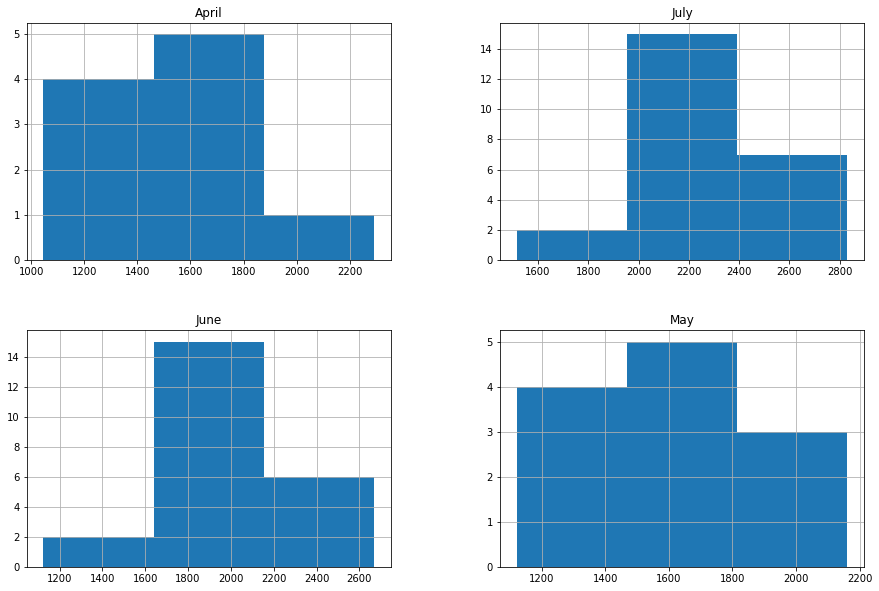

In [14]:
# Distribution of total calories in individual months

pd.concat(PERSON2.TotalCal,axis=1).hist(bins=3,figsize=(15,10))

plt.show()

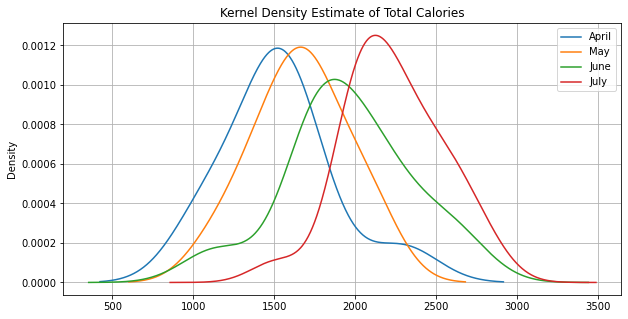

In [15]:
pd.concat(PERSON2.TotalCal,axis=1).plot(kind='kde',figsize=(10,5))
plt.grid()
plt.title('Kernel Density Estimate of Total Calories')
plt.show()

In general, the calories output for PERSON2 has incease over the month, averaging around 2000.

### Comparison Between Months

#### Checking Active Days

In [16]:
# Counting the numbner of Active days (days of exercise):

def count_nonZero(z):
    count = 0
    for x in z:
        if x !=0:
            count = count + 1
    return count

pivot_hr_cal = PERSON2.df_hr_calories.pivot_table(values=['minutes_Peak','minutes_Cardio','minutes_Fatburn'],
                                                  index='m_num', aggfunc=count_nonZero).sort_index()
pivot_hr_cal

,minutes_Cardio,minutes_Fatburn,minutes_Peak
m_num,,,
4,7.0,10.0,3.0
5,5.0,12.0,2.0
6,9.0,23.0,5.0
7,9.0,24.0,3.0


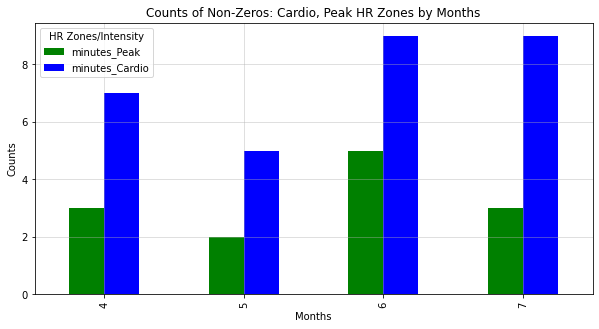

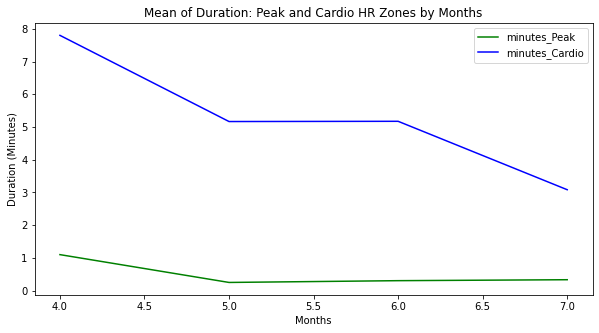

In [17]:
#Plotting the count of non-zeros for Minute_Cardio, Minute_Fatburn and Minute_Peak

# the intensity level (Lower to Higher): 1.Fat burn, 2.Cardio, 3.Peak 

pivot_hr_cal[['minutes_Peak','minutes_Cardio']].plot(kind='bar',figsize=(10,5),color=['green','blue'])
plt.title('Counts of Non-Zeros: Cardio, Peak HR Zones by Months')
plt.ylabel('Counts')
plt.xlabel('Months')

plt.legend(title='HR Zones/Intensity')

plt.grid(':',alpha=0.5)
PERSON2.df_hr_calories.groupby('m_num')[['minutes_Peak','minutes_Cardio']].mean().plot(figsize=(10,5),color=['green','blue'])
plt.title('Mean of Duration: Peak and Cardio HR Zones by Months')
plt.ylabel('Duration (Minutes)')
plt.xlabel('Months')
plt.show()


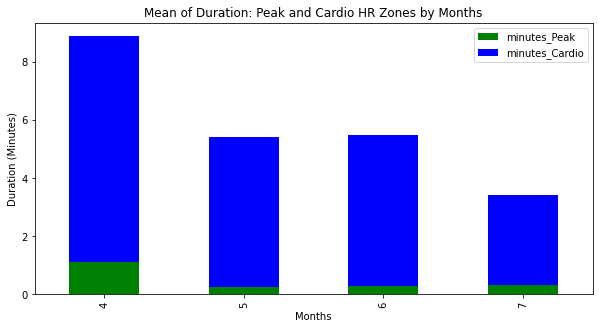

In [18]:
PERSON2.df_hr_calories.groupby('m_num')[['minutes_Peak','minutes_Cardio']].mean().plot(kind='bar',stacked=True,figsize=(10,5),color=['green','blue'])
plt.title('Mean of Duration: Peak and Cardio HR Zones by Months')
plt.ylabel('Duration (Minutes)')
plt.xlabel('Months')
plt.show()

In [19]:
Total_active_duration = PERSON2.df_hr_calories[['minutes_Peak','minutes_Cardio']].sum(axis=1)
Total_active_duration.index = pd.to_datetime(Total_active_duration.index)
Total_active_duration = pd.DataFrame({'m_num':Total_active_duration.index.month,
                                               'Very_Active_Duration':Total_active_duration})
Total_active_duration.groupby('m_num').mean()*7

,Very_Active_Duration
m_num,
4,62.300000
5,37.916667
6,38.347826
7,23.916667


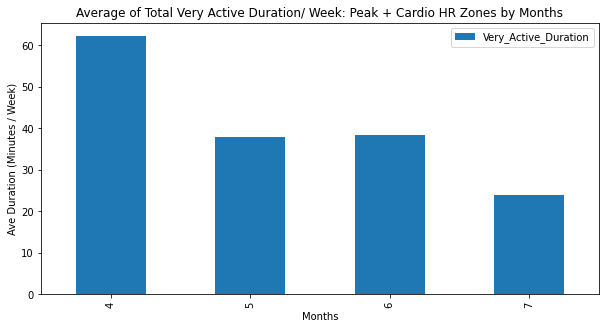

In [20]:
Ave_per_week = Total_active_duration.groupby('m_num').mean()*7 # Average Per Week

Ave_per_week.plot(kind='bar',figsize=(10,5))
plt.title('Average of Total Very Active Duration/ Week: Peak + Cardio HR Zones by Months')
plt.ylabel('Ave Duration (Minutes / Week)')
plt.xlabel('Months')
plt.show()

In [21]:
PERSON2.df_hr_calories.groupby('m_num')[['minutes_Peak','minutes_Cardio']].max()


,minutes_Peak,minutes_Cardio
m_num,,
4,5.0,19.0
5,2.0,23.0
6,2.0,21.0
7,5.0,26.0


Judging from the count of non zero minutes_Peak, there are more recorded days exercised are similar in JUN at <b>5 days</b>.

The mean plot of Peak and Cardio minutes shows that on average, the exercise in APR had the more intensity (longer duration in higher HR zones). Same as PERSON1.

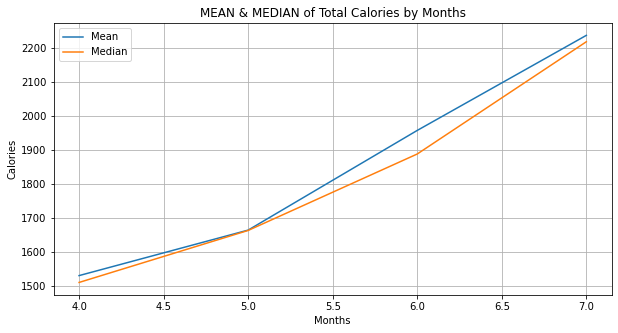

In [22]:
plt.figure(figsize=(10,5))

plt.plot(PERSON2.df_hr_calories.groupby('m_num')['Total_caloriesOut'].mean(),label='Mean')

plt.plot(PERSON2.df_hr_calories.groupby('m_num')['Total_caloriesOut'].median(),label='Median')
plt.title('MEAN & MEDIAN of Total Calories by Months')
plt.xlabel('Months')
plt.ylabel('Calories')
plt.grid()
plt.legend()
plt.show()

The Mean and Median shows that since FEB, recorded activity increases. We will later cross check with steps.

### EXPLORING Step Activities


In [23]:
# Changing the index into datetimeindex.
PERSON2.df_activity_steps.index = pd.to_datetime(PERSON2.df_activity_steps.index)

PERSON2.df_activity_steps['month'] = PERSON2.df_activity_steps.index.month
PERSON2.df_activity_steps['m_num'] = PERSON2.df_activity_steps.index.month_name()

PERSON2.df_activity_steps

,step_count,month,m_num
dateTime,,,
2020-04-05,2233,4,April
2020-04-06,8208,4,April
2020-04-07,6070,4,April
2020-04-08,9494,4,April
2020-04-09,4849,4,April
...,...,...,...
2020-07-27,5686,7,July
2020-07-28,4282,7,July
2020-07-29,7370,7,July


In [24]:
# Viewing the number of records:

PERSON2.df_activity_steps[['step_count','month']].groupby('month').count()

,step_count
month,
4,14
5,16
6,26
7,30


#### Distribution for Steps

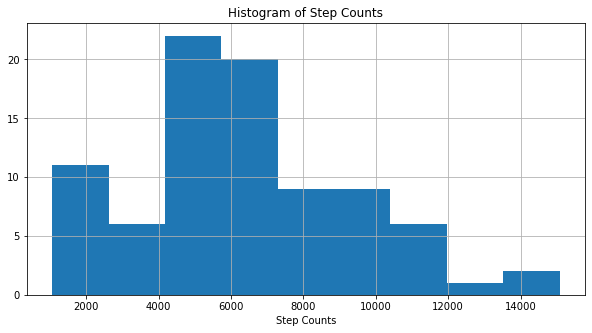

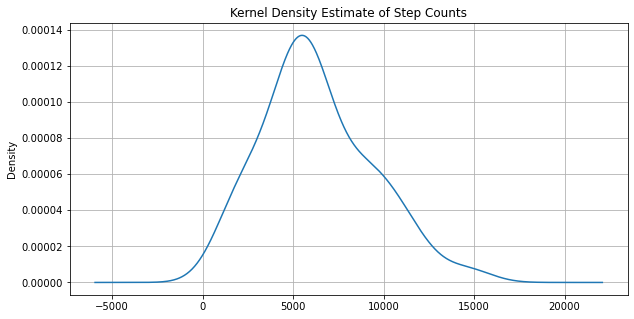

In [25]:
PERSON2.df_activity_steps.step_count.hist(figsize=(10,5),bins=9)
plt.xlabel('Step Counts')
plt.title('Histogram of Step Counts')
plt.show()

PERSON2.df_activity_steps.step_count.plot(kind='kde',figsize=(10,5))
plt.grid()
plt.title('Kernel Density Estimate of Step Counts')
plt.show()

Next, split into weeks or months to compare:

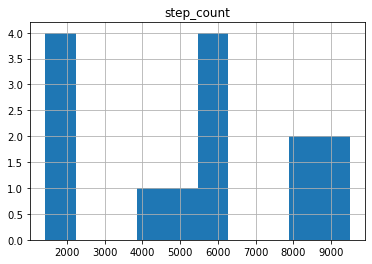

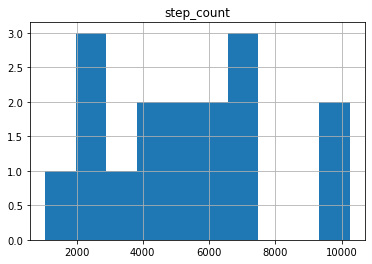

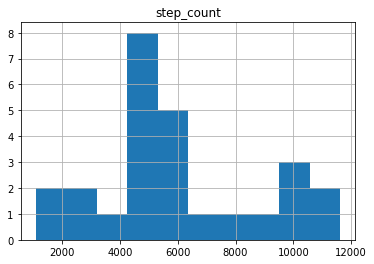

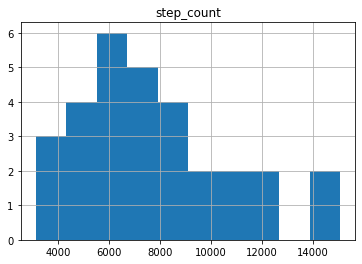

In [26]:
PERSON2.df_activity_steps[['step_count','month']].groupby('month').hist()
plt.show()

As seen from the above histogram plots, the distribution of steps in each month does not really follow a normal distribution.

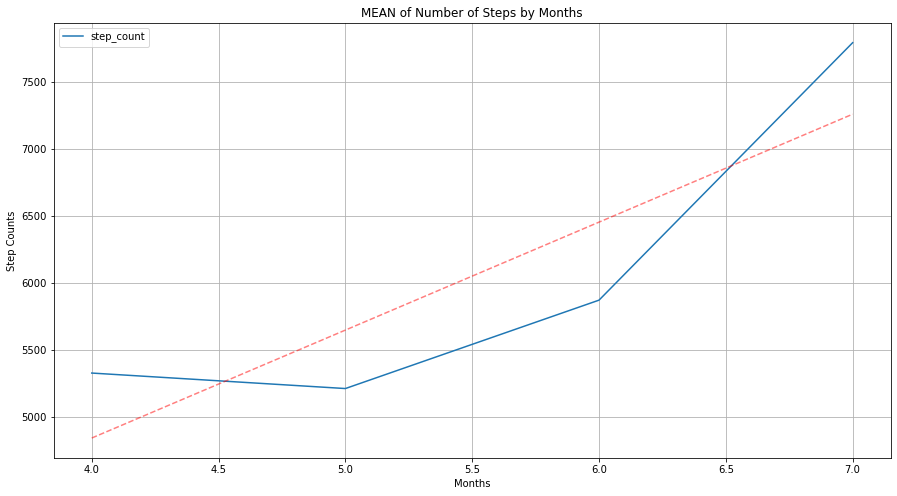

In [27]:
# Trend of steps for the months:
grouped_steps = PERSON2.df_activity_steps[['step_count','month']].groupby('month').mean()
grouped_steps.plot(figsize=(15,8),label='Mean')


# Linear Regression Fit for trendline:
lm_step = lm.LinearRegression()
lm_step.fit(grouped_steps.index.to_numpy().reshape(-1, 1),
                  grouped_steps.to_numpy().reshape(-1, 1))
pred_steps = lm_step.predict(grouped_steps.index.to_numpy().reshape(-1, 1))

plt.plot(grouped_steps.index,pred_steps,'--r',alpha=0.5)

plt.title('MEAN of Number of Steps by Months')
plt.xlabel('Months')
plt.ylabel('Step Counts')
plt.grid()
plt.legend()
plt.show()

### Exploring Sleep Data

#### Sleep Durations and Sleep Stages

In [28]:
# Renamed the columns for lesser confusion.
PERSON2.df_sleep_durations = PERSON2.df_sleep_durations.rename(columns={'duration':'sleep_duration','efficiency':'sleep_efficiency'})
PERSON2.df_sleep_durations

,sleep_duration,minutesAsleep,sleep_efficiency,startTime,endTime,DeepSleep_Count,DeepSleep_Minutes,LightSleep_Count,LightSleep_Minutes,RemSleep_Count,RemSleep_Minutes,Wake_Count,Wake_Minutes
dateOfSleep,,,,,,,,,,,,,
2020-07-31,655.0,590,93,2020-07-31 00:31:30,2020-07-31 11:26:30,7.0,88.0,48.0,367.0,18.0,135.0,55.0,65.0
2020-07-30,459.0,419,98,2020-07-29 23:13:30,2020-07-30 06:52:30,4.0,78.0,31.0,252.0,14.0,89.0,34.0,40.0
2020-07-29,387.0,325,97,2020-07-28 23:30:00,2020-07-29 05:57:00,3.0,77.0,23.0,218.0,6.0,30.0,24.0,62.0
2020-07-28,475.0,420,98,2020-07-27 23:17:00,2020-07-28 07:12:00,3.0,68.0,30.0,256.0,13.0,96.0,32.0,55.0
2020-07-27,247.0,222,99,2020-07-27 03:03:00,2020-07-27 07:10:00,3.0,42.0,16.0,131.0,6.0,49.0,16.0,25.0
2020-07-26,541.0,459,94,2020-07-26 02:21:30,2020-07-26 11:23:00,6.0,105.0,34.0,224.0,17.0,130.0,40.0,82.0
2020-07-19,486.0,417,95,2020-07-19 02:27:30,2020-07-19 10:34:00,4.0,90.0,39.0,238.0,11.0,89.0,37.0,69.0
2020-07-18,618.0,550,98,2020-07-18 01:00:00,2020-07-18 11:18:00,4.0,98.0,50.0,310.0,20.0,142.0,56.0,68.0
2020-07-17,426.0,354,95,2020-07-16 23:54:30,2020-07-17 07:00:30,8.0,80.0,29.0,208.0,7.0,66.0,29.0,72.0


#### Sleep Efficiency

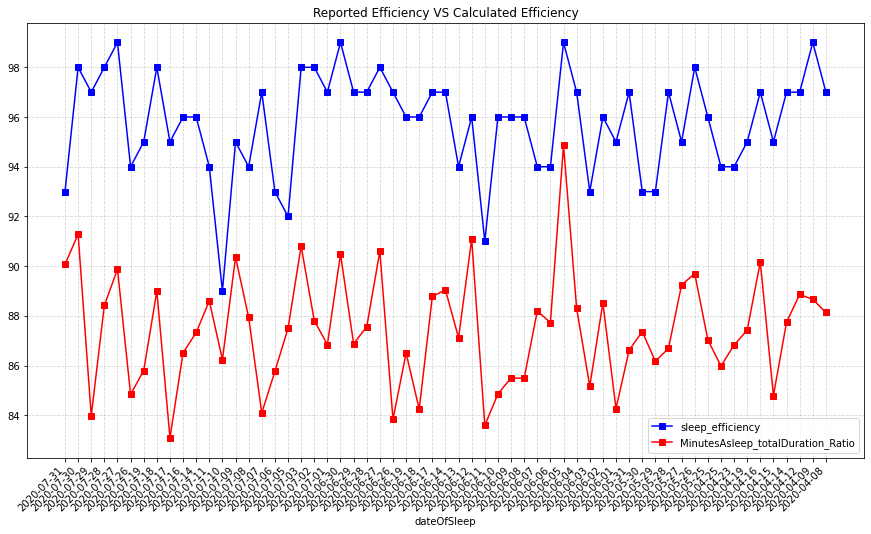

In [29]:
# Exploring the sleep efficiency

asleepVStotal_ratio = PERSON2.df_sleep_durations.minutesAsleep/PERSON2.df_sleep_durations.sleep_duration

PERSON2.df_sleep_durations['sleep_efficiency'].plot(figsize=(15,8),color='b',marker='s')
plt.plot(asleepVStotal_ratio*100,color='r',marker='s',label='MinutesAsleep_totalDuration_Ratio')

plt.xticks(PERSON2.df_sleep_durations.index,PERSON2.df_sleep_durations.index,
           rotation=45,ha='right')
plt.grid(True,alpha=0.5,ls='--')
plt.legend()
plt.title('Reported Efficiency VS Calculated Efficiency')
plt.show()

As observed above, Sleep efficiency was not equal to the ratio of minute asleep to the total sleep duration. The Sleep Efficiency definition given by FitBit was: 
- time asleep / (total time in bed - time to fall asleep)

However the time to fall asleep were not reflected in the fetched data to verify the calculations. The time to falling asleep can also be calculated backwards if required.

The sleep efficiency calculated by fitbit were generally higher than the simple ratio of minutes asleep over total duration of sleep, with the inclusion of time to fall asleep.


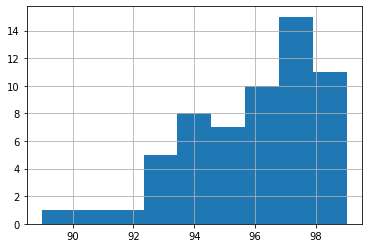

In [30]:
# DISTRIBUTION OF SLEEP EFFICIENCY

PERSON2.df_sleep_durations['sleep_efficiency'].hist(bins=9)
plt.show()

#### Verifying of Total Sleep Durations

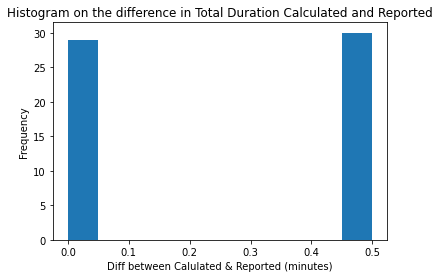

In [31]:
# Calculating the total duration in bed using start time and end time.
# and Comparing with the reported Total Durations

x_duration = (PERSON2.df_sleep_durations.endTime - PERSON2.df_sleep_durations.startTime)
x_duration_diff = x_duration.dt.total_seconds()/float(60) - PERSON2.df_sleep_durations.sleep_duration
x_duration_diff.plot(kind='hist')
plt.title('Histogram on the difference in Total Duration Calculated and Reported')
plt.xlabel('Diff between Calulated & Reported (minutes)')
plt.show()

As shown, the total duration calculations were a bit off for certain days, but the delta were not a lot. At most 30 seconds, for half of the records. 

#### Percentage Duration for each phase of sleep

In order to compare this statistic more meaningfully, the duration of each sleep stage should be calculated in percentage of the total sleep duration. (X_Minutes/sleep_duration)* 100, where X is the respective sleep stages.

In [32]:
# Finding Percentage of each Sleep Stage out of total sleep duration

Sleep_Stage_Durations = PERSON2.df_sleep_durations[[x for x in PERSON2.df_sleep_durations.columns if 'minutes' in x.lower()]]

# Percentage of sleep stage duration out of sleep duration
Percent_Sleep_Durations = Sleep_Stage_Durations.apply(lambda x: x/PERSON2.df_sleep_durations.sleep_duration * 100)
Percent_Sleep_Durations

,minutesAsleep,DeepSleep_Minutes,LightSleep_Minutes,RemSleep_Minutes,Wake_Minutes
dateOfSleep,,,,,
2020-07-31,90.076336,13.435115,56.030534,20.610687,9.923664
2020-07-30,91.285403,16.993464,54.901961,19.389978,8.714597
2020-07-29,83.979328,19.896641,56.330749,7.751938,16.020672
2020-07-28,88.421053,14.315789,53.894737,20.210526,11.578947
2020-07-27,89.878543,17.004049,53.036437,19.838057,10.121457
2020-07-26,84.842884,19.408503,41.404806,24.029575,15.157116
2020-07-19,85.802469,18.518519,48.971193,18.312757,14.197531
2020-07-18,88.996764,15.857605,50.161812,22.977346,11.003236
2020-07-17,83.098592,18.779343,48.826291,15.492958,16.901408


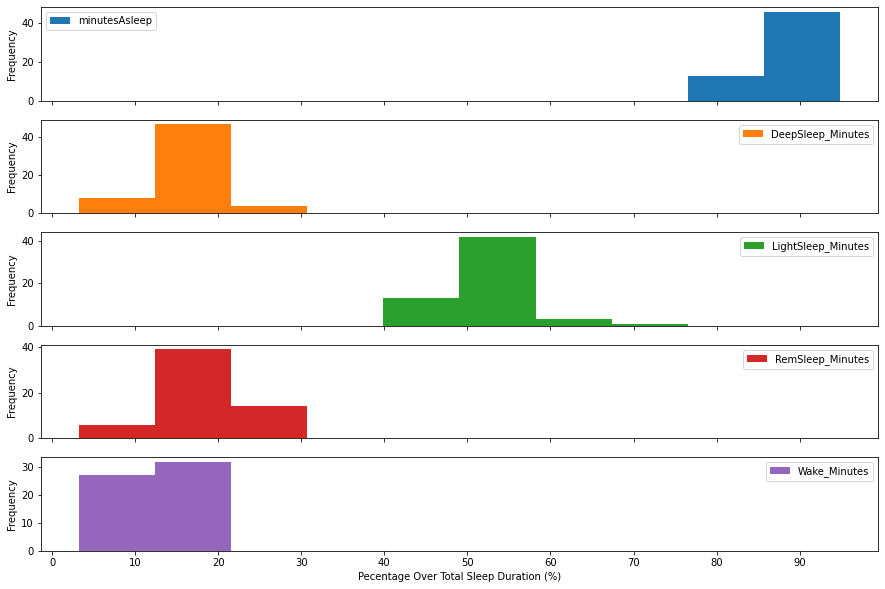

In [33]:
# Plotting out HISTOGRAM of percentage duration of each stage

Percent_Sleep_Durations.plot(kind='hist',bins=10,subplots=True,figsize=(15,10))
plt.xticks(np.linspace(0,100,num=10,endpoint=False))
plt.xlabel('Pecentage Over Total Sleep Duration (%)')
plt.show()

Deep sleep, REM sleep and wake timing occupies about <b>15%</b> of the total sleep duration. Light sleep occurs roughly <b>50%</b> of total duration.

In [34]:
Percent_Sleep_Durations.mean()

minutesAsleep         87.463507
DeepSleep_Minutes     16.678317
LightSleep_Minutes    52.645450
RemSleep_Minutes      18.139740
Wake_Minutes          12.536493
dtype: float64

In [35]:

Sleep_Stage_Counts = PERSON2.df_sleep_durations[[x for x in PERSON2.df_sleep_durations.columns if 'count' in x.lower()]]
Sleep_Stage_Counts

,DeepSleep_Count,LightSleep_Count,RemSleep_Count,Wake_Count
dateOfSleep,,,,
2020-07-31,7.0,48.0,18.0,55.0
2020-07-30,4.0,31.0,14.0,34.0
2020-07-29,3.0,23.0,6.0,24.0
2020-07-28,3.0,30.0,13.0,32.0
2020-07-27,3.0,16.0,6.0,16.0
2020-07-26,6.0,34.0,17.0,40.0
2020-07-19,4.0,39.0,11.0,37.0
2020-07-18,4.0,50.0,20.0,56.0
2020-07-17,8.0,29.0,7.0,29.0


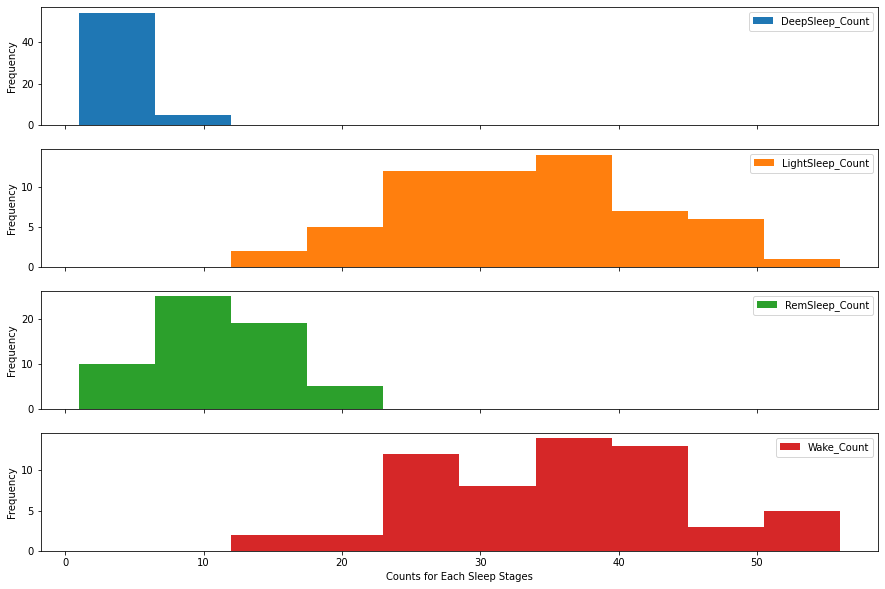

In [36]:
# Plotting out HISTOGRAM for sleep stage counts

Sleep_Stage_Counts.plot(kind='hist',bins=10,subplots=True,figsize=(15,10))
plt.xlabel('Counts for Each Sleep Stages')
plt.show()

From the histograms above, it seems like the sleep stage durations and counts follow something like a normal distribution.

#### Finding the averaged durations for each Sleep Stage over the respective counts

To better use of both statistic of Sleep stages, the sleep stage count and durations can be combined into a single stat, avergage duration per count.

In [37]:
# Finding the averaged durations for each Sleep Stage over the respective counts

# Rename Column Name to be the same as 'Percent_Sleep_Durations' to for division
Sleep_Stage_Counts.columns = Percent_Sleep_Durations.drop(columns='minutesAsleep').columns

# Finding ave duration for each stage in seconds
Ave_Stage_Duration = ((Percent_Sleep_Durations.drop(columns='minutesAsleep')/Sleep_Stage_Counts)*float(60))

# Rename Column Name
Ave_Stage_Duration.columns = Ave_Stage_Duration.columns.str.replace('Minutes','SecPerCount')

Ave_Stage_Duration



,DeepSleep_SecPerCount,LightSleep_SecPerCount,RemSleep_SecPerCount,Wake_SecPerCount
dateOfSleep,,,,
2020-07-31,115.158124,70.038168,68.702290,10.825815
2020-07-30,254.901961,106.261860,83.099907,15.378700
2020-07-29,397.932817,146.949781,77.519380,40.051680
2020-07-28,286.315789,107.789474,93.279352,21.710526
2020-07-27,340.080972,198.886640,198.380567,37.955466
2020-07-26,194.085028,73.067305,84.810264,22.735675
2020-07-19,277.777778,75.340298,99.887767,23.023023
2020-07-18,237.864078,60.194175,68.932039,11.789182
2020-07-17,140.845070,101.019913,132.796781,34.968431


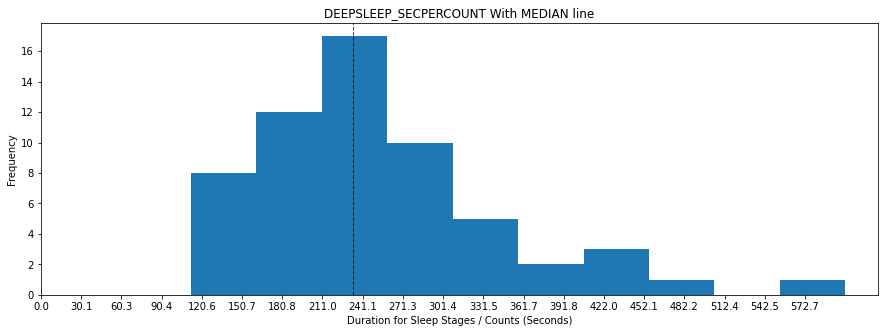

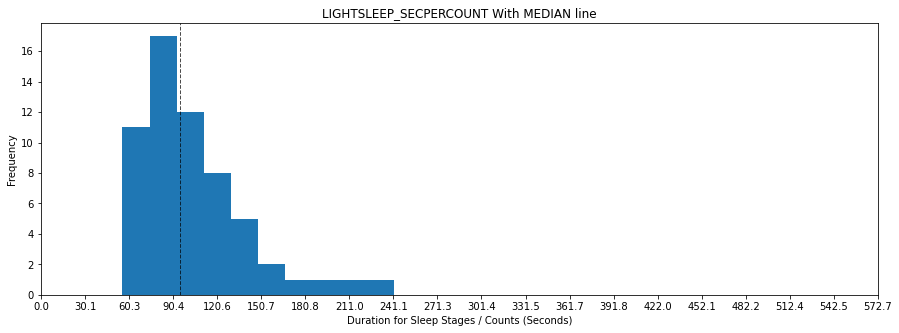

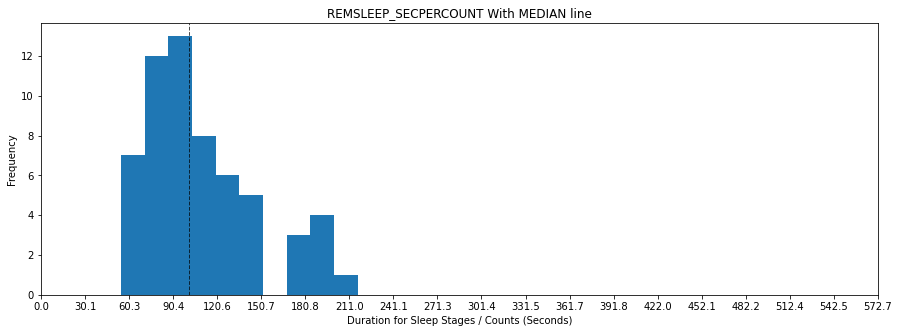

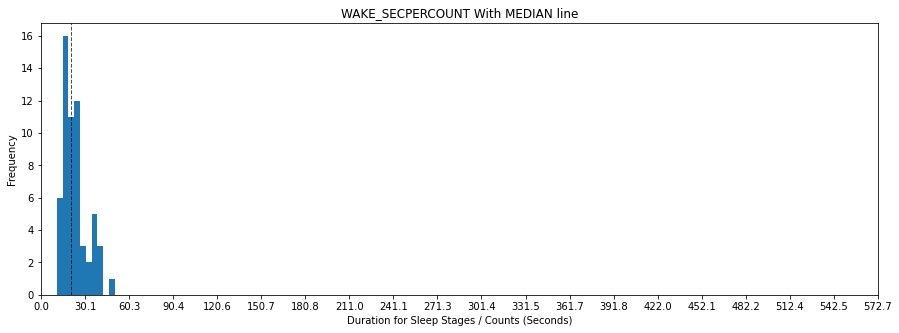

In [38]:
# Plotting out HISTOGRAM

MAX = max(Ave_Stage_Duration.max())

for col in Ave_Stage_Duration:
    Ave_Stage_Duration[col].plot(kind='hist',bins=10,figsize=(15,5))
    plt.axvline(Ave_Stage_Duration[col].median(), color='k', linestyle='dashed', linewidth=1,alpha=0.7)
    plt.xticks(np.linspace(0,MAX,num=20,endpoint=False))
    plt.xlabel('Duration for Sleep Stages / Counts (Seconds)')
    plt.title(col.upper()+' With MEDIAN line')
    plt.show()

Deep Sleep duration per count appears to be higher because the counts are lower, as compare to the other stages. This value could be use to tell when the counts for the stage had increased or the duration for the stage had increased.

Wake had the least value as the counts are more than others.

#### Intraday Heart Rate During Sleep Stages 

In [39]:
PERSON2.df_intra_sleep_stage

,dateOfSleep,level,minutes,date,time
dateTime,,,,,
2020-07-31 00:31:30,2020-07-31,wake,0.5,20-07-31,00:31:30
2020-07-31 00:32:00,2020-07-31,light,14.0,20-07-31,00:32:00
2020-07-31 00:46:00,2020-07-31,deep,5.0,20-07-31,00:46:00
2020-07-31 00:51:00,2020-07-31,light,2.5,20-07-31,00:51:00
2020-07-31 00:53:30,2020-07-31,deep,5.5,20-07-31,00:53:30
...,...,...,...,...,...
2020-04-08 05:17:00,2020-04-08,rem,4.5,20-04-08,05:17:00
2020-04-08 05:21:30,2020-04-08,light,38.5,20-04-08,05:21:30
2020-04-08 06:00:00,2020-04-08,deep,21.5,20-04-08,06:00:00


In [40]:
PERSON2.df_intraday_hr

,time,value,date,timestamp,d_timestamp
d_time,,,,,
2020-04-05 12:40:20,12:40:20,93,2020-04-05,-2208943180000000000,1586090420000000000
2020-04-05 12:40:25,12:40:25,70,2020-04-05,-2208943175000000000,1586090425000000000
2020-04-05 12:40:30,12:40:30,70,2020-04-05,-2208943170000000000,1586090430000000000
2020-04-05 12:40:45,12:40:45,70,2020-04-05,-2208943155000000000,1586090445000000000
2020-04-05 12:40:50,12:40:50,72,2020-04-05,-2208943150000000000,1586090450000000000
...,...,...,...,...,...
2020-07-31 23:58:26,23:58:26,52,2020-07-31,-2208902494000000000,1596239906000000000
2020-07-31 23:58:41,23:58:41,53,2020-07-31,-2208902479000000000,1596239921000000000
2020-07-31 23:58:46,23:58:46,54,2020-07-31,-2208902474000000000,1596239926000000000


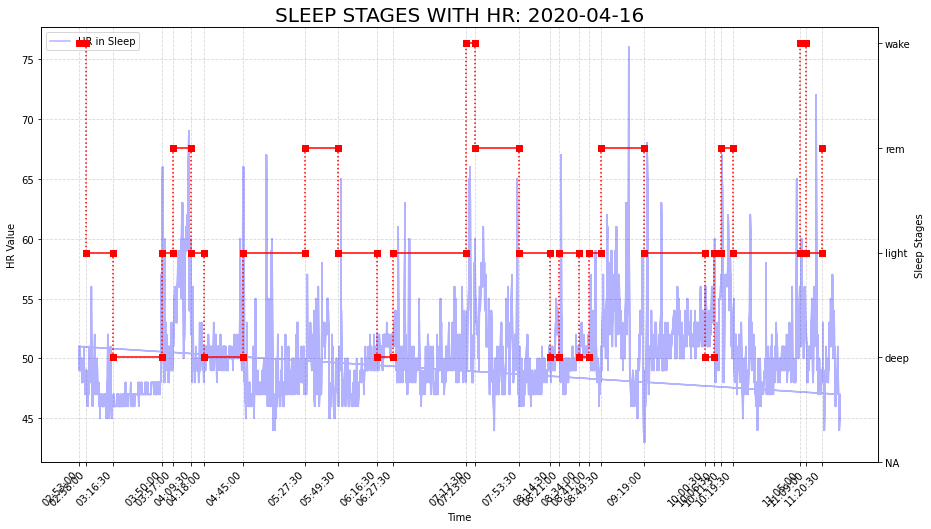

In [41]:
# Intra-Day Heart Rate at Detailed Sleep Stages

def convert_stage(x):
    if x == 'wake':
        return 3.0
    elif x == 'rem':
        return 2.0
    elif x == 'light':
        return 1.0
    elif x == 'deep':
        return 0.0
    else: return -1.0

select_date = '2020-04-16' # Change date here

START = str(PERSON2.df_sleep_durations.loc[select_date].startTime)
END = str(PERSON2.df_sleep_durations.loc[select_date].endTime)

# Fetching HR during the Sleep duration (within StartTime and EndTime):
SleepHR = PERSON2.df_intraday_hr[START:END]

# Plotting HR :
# SleepHR['value'].plot(figsize=(15,8),color='b',label='HR in Sleep')
plt.figure(figsize=(15,8))
plt.plot(SleepHR.index.astype(int),SleepHR.value,color='b',alpha=0.3,label='HR in Sleep')

plt.title('SLEEP STAGES WITH HR: '+ select_date,fontdict={'fontsize':20})
plt.grid(True,alpha=0.5,ls='--')
plt.xlabel('Time')
plt.ylabel('HR Value')
plt.legend(loc='upper left')

# Plotting Sleep Stage:

SleepStage = PERSON2.df_intra_sleep_stage[PERSON2.df_intra_sleep_stage.dateOfSleep == select_date]

# Create a list to plot lines for the different sleep stages.
index_list = SleepStage.index.astype(int).to_list()

plt.xticks(ticks=index_list, labels=SleepStage.time, rotation=45, ha='right')

y_values = SleepStage.level.apply(convert_stage)

ax2 = plt.twinx() # Create another axis 

for i in range(0,len(SleepStage)-1):
    
    # actual Sleep stage duration:
    line_x = [index_list[i],index_list[i+1]]
    line_y = [y_values.iloc[i],y_values.iloc[i]]
    
    # Transition to next stage:
    line_x1 = [index_list[i+1],index_list[i+1]]
    line_y1 = [y_values.iloc[i],y_values.iloc[i+1]]

    ax2.plot(line_x,line_y,'s-r') # Solid line
    ax2.plot(line_x1,line_y1,'s:r') # Dotted line

plt.ylabel('Sleep Stages')
plt.yticks(ticks= [-1,0,1,2,3], labels= ['NA','deep','light','rem','wake'])

plt.show()

The Last point of the sleep stage will last till the end of the sleep.

From the above plot in contrast, it is observable that:
- Heart Rate seems to have little variation when in Deep sleep 
- Heart Rate seem to rise, with rapid changes when in REM stage
- Heart Rate does not point out when user is awake, most probably deteced when Movement is sensed.
- Light Sleep makes up the rest of the non catagorised.

#### Sleep Duration and Efficiency

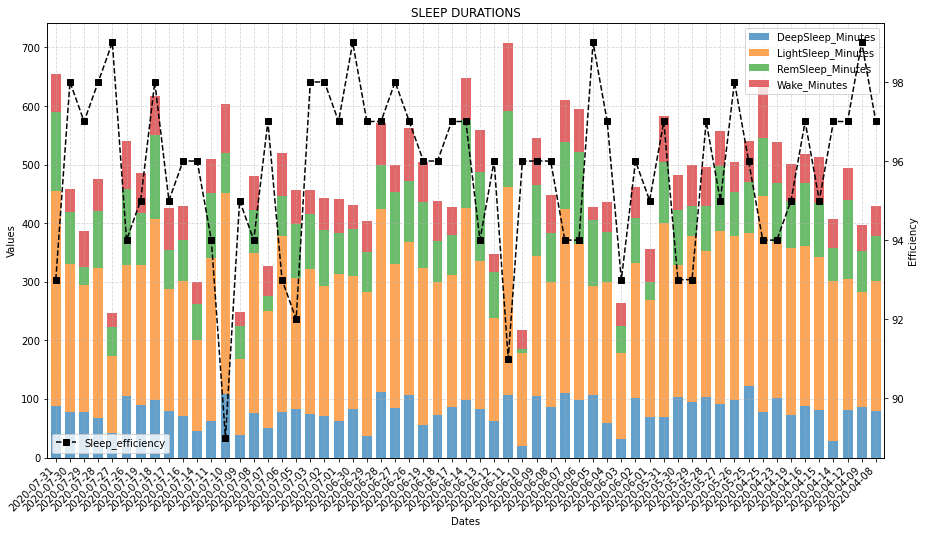

In [42]:
# Plotting Sleep Durations and efficiency using df.plot()

col = [x for x in PERSON2.df_sleep_durations.columns if 'minutes' in x.lower() and 'minutesAsleep' not in x]

PERSON2.df_sleep_durations[col].plot(kind='bar',figsize=(15,8),stacked=True,width=0.7,alpha=0.7)

plt.grid(True,alpha=0.5,ls='--')
plt.title('SLEEP DURATIONS')
plt.xticks(rotation=45,ha='right')
plt.xlabel('Dates')
plt.ylabel('Values')

ax2 = plt.twinx() # Create another axis to display Sleep efficiency
ax2.set_ylabel('Efficiency')
ax2.plot(PERSON2.df_sleep_durations.index, PERSON2.df_sleep_durations.sleep_efficiency, 
         '--sk',label='Sleep_efficiency')

ax2.legend()

plt.show()

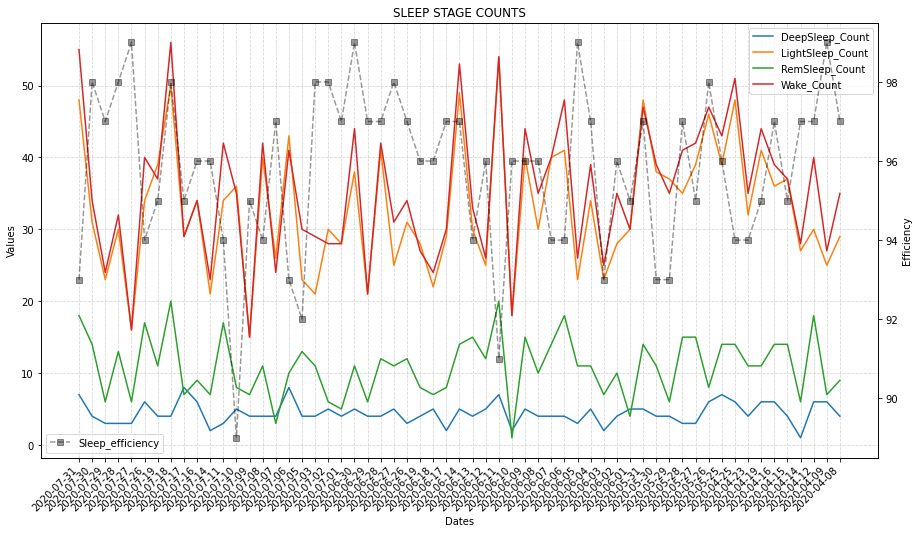

In [43]:
# Plotting Sleep Stage counts with efficiency using df.plot()

col = [x for x in PERSON2.df_sleep_durations.columns if 'Count' in x ]

PERSON2.df_sleep_durations[col].plot(figsize=(15,8))

plt.grid(True,alpha=0.5,ls='--')
plt.title('SLEEP STAGE COUNTS')
plt.xticks(rotation=45,ha='right')
plt.xlabel('Dates')
plt.ylabel('Values')

ax2 = plt.twinx() # Create another axis to display Sleep efficiency
ax2.set_ylabel('Efficiency')
ax2.plot(PERSON2.df_sleep_durations.index, PERSON2.df_sleep_durations.sleep_efficiency, 
         '--sk', alpha=0.4,label='Sleep_efficiency')
ax2.legend()

plt.show()

From the above plots:
1. The total sleep duration consist of mostly "Light" sleep.
2. The amount of deep sleep is the lowest.
3. Generally, the sleep efficiency reported by FitBit increases when the amount of sleep increase and amount of wake reduces. No clear relations with Quality of sleep, ie. from the sleep stages "Light", "Rem" and "Deep".


#### Trends for sleep duaration by months:

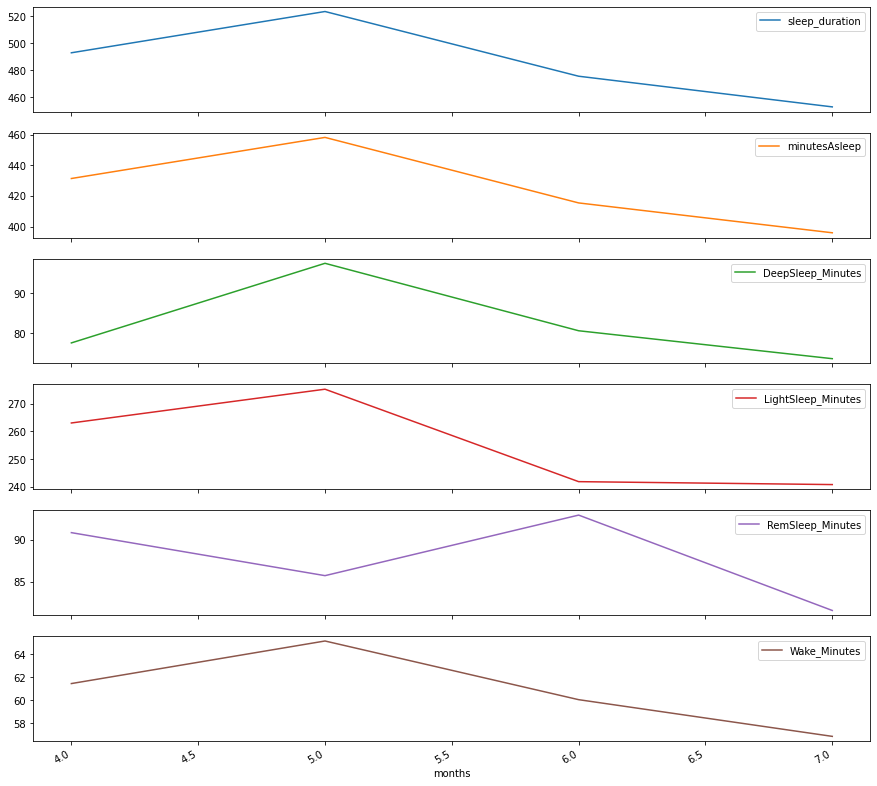

In [44]:
# Trends for Sleep Durations by months:

col = [x for x in PERSON2.df_sleep_durations.columns if 'minutes' in x.lower() or 'duration' in x.lower()]

PERSON2.df_sleep_durations.index = pd.to_datetime(PERSON2.df_sleep_durations.index)

# Splitting by months:
PERSON2.df_sleep_durations['months'] = PERSON2.df_sleep_durations.index.month

PERSON2.df_sleep_durations.groupby('months')[col].mean().plot(figsize=(15,15), subplots=True)

plt.show()

From the above plots, the average duration of sleep has decreased over the months for PERSON2.

In [45]:
# Viewing number of records for each month:
PERSON2.df_sleep_durations.groupby('months').count()

,sleep_duration,minutesAsleep,sleep_efficiency,startTime,endTime,DeepSleep_Count,DeepSleep_Minutes,LightSleep_Count,LightSleep_Minutes,RemSleep_Count,RemSleep_Minutes,Wake_Count,Wake_Minutes
months,,,,,,,,,,,,,
4,9,9,9,9,9,9,9,9,9,9,9,9,9
5,7,7,7,7,7,7,7,7,7,7,7,7,7
6,22,22,22,22,22,22,22,22,22,22,22,22,22
7,21,21,21,21,21,21,21,21,21,21,21,21,21


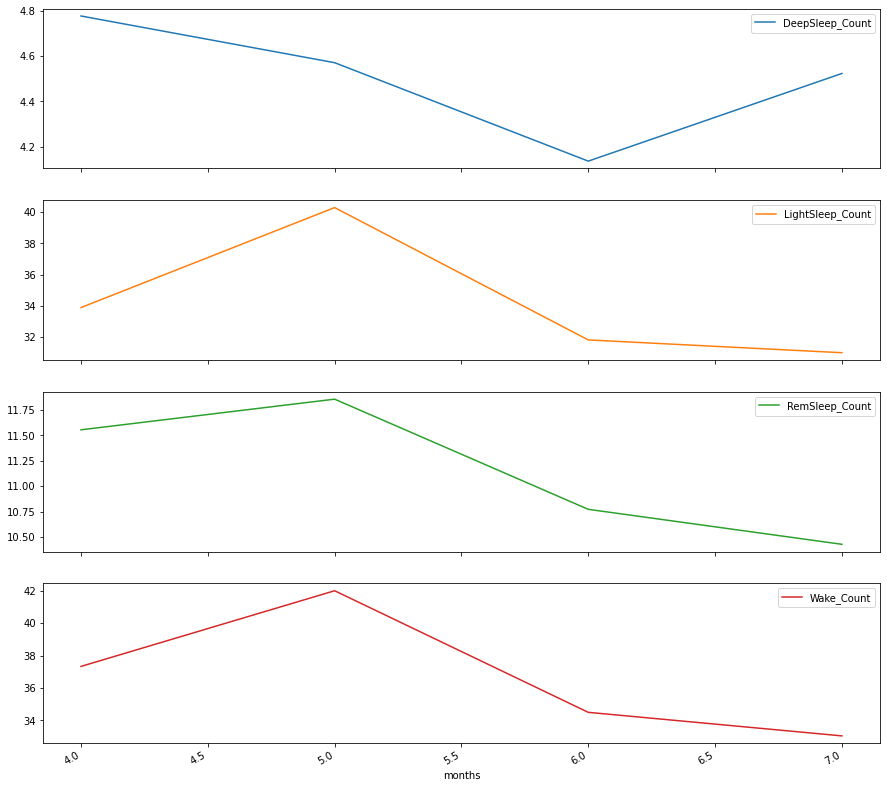

In [46]:
# Trends for Sleep stage counts by months:

col = [x for x in PERSON2.df_sleep_durations.columns if 'count' in x.lower()]

PERSON2.df_sleep_durations.index = pd.to_datetime(PERSON2.df_sleep_durations.index)

# Splitting by months:
PERSON2.df_sleep_durations['months'] = PERSON2.df_sleep_durations.index.month

PERSON2.df_sleep_durations.groupby('months')[col].mean().plot(figsize=(15,15), subplots=True)

plt.show()

Shown above, the number of sleep stage counts had also decreased over the months. This is due to the sleep durations getting shorter.

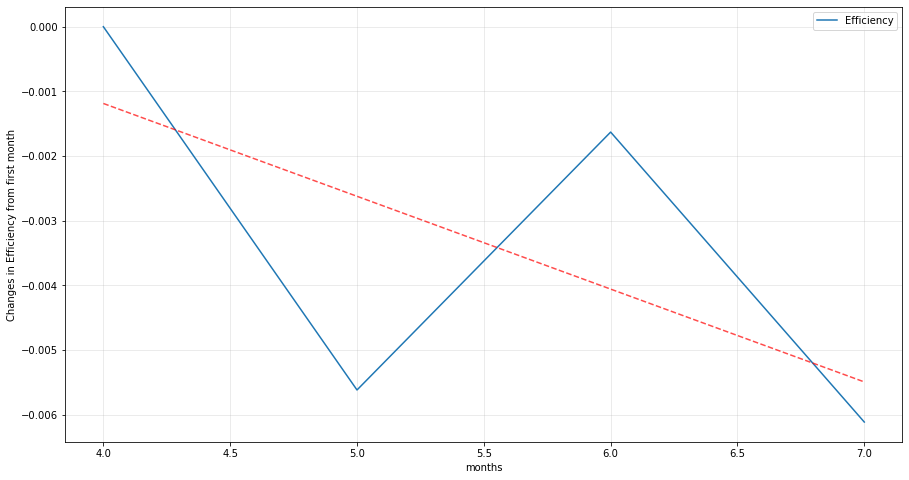

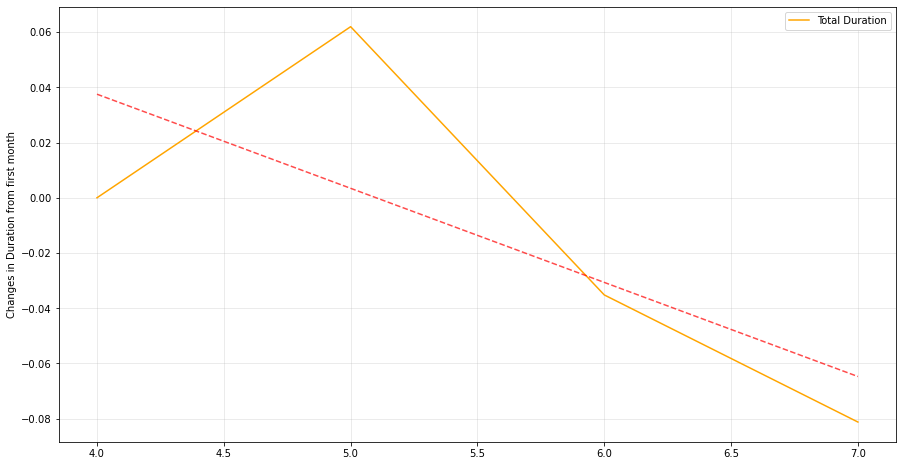

In [47]:
# Trends for Sleep duration and efficiency by months:

PERSON2.df_sleep_durations.index = pd.to_datetime(PERSON2.df_sleep_durations.index)

# Splitting by months:
PERSON2.df_sleep_durations['months'] = PERSON2.df_sleep_durations.index.month

# Changes as percentage changes from the first month:
diff_efficiency = PERSON2.df_sleep_durations.groupby('months')['sleep_efficiency'].mean()
diff_efficiency = diff_efficiency.apply(lambda x:(x-diff_efficiency.iloc[0])/diff_efficiency.iloc[0])

diff_durations = PERSON2.df_sleep_durations.groupby('months')['sleep_duration'].mean()
diff_durations = diff_durations.apply(lambda x:(x-diff_durations.iloc[0])/diff_durations.iloc[0])

# Linear Regression Fit for trendline:
lm_efficiency = lm.LinearRegression()
lm_efficiency.fit(diff_efficiency.index.to_numpy().reshape(-1, 1),
                  diff_efficiency.to_numpy().reshape(-1, 1))
pred_efficiency = lm_efficiency.predict(diff_efficiency.index.to_numpy().reshape(-1, 1))

lm_durations = lm.LinearRegression()
lm_durations.fit(diff_durations.index.to_numpy().reshape(-1, 1),
                  diff_durations.to_numpy().reshape(-1, 1))
pred_durations = lm_durations.predict(diff_durations.index.to_numpy().reshape(-1, 1))


# Plotting:
diff_efficiency.plot(figsize=(15,8),label="Efficiency")
plt.plot(diff_efficiency.index.to_numpy(),pred_efficiency,'--r',alpha=0.7)
plt.ylabel("Changes in Efficiency from first month")
plt.grid(":",alpha=0.3,axis="both")
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
plt.plot(diff_durations,label="Total Duration",color='orange')
plt.plot(diff_durations.index.to_numpy(),pred_durations,'--r',alpha=0.7)
plt.ylabel("Changes in Duration from first month")
plt.grid(":",alpha=0.3,axis="both")
plt.legend()
plt.show()


In comparison of the above graph, sleep efficiency does not change much accordingly to how long the total sleep duration is. As the Sleep duration increased from FEB to JUL, the efficiency drops.

#### Trends for sleep time

In [48]:
PERSON2.df_sleep_durations.startTime

dateOfSleep
2020-07-31   2020-07-31 00:31:30
2020-07-30   2020-07-29 23:13:30
2020-07-29   2020-07-28 23:30:00
2020-07-28   2020-07-27 23:17:00
2020-07-27   2020-07-27 03:03:00
2020-07-26   2020-07-26 02:21:30
2020-07-19   2020-07-19 02:27:30
2020-07-18   2020-07-18 01:00:00
2020-07-17   2020-07-16 23:54:30
2020-07-16   2020-07-15 23:50:30
2020-07-14   2020-07-14 02:19:00
2020-07-11   2020-07-11 02:44:30
2020-07-10   2020-07-10 01:10:00
2020-07-09   2020-07-09 01:57:30
2020-07-08   2020-07-08 02:04:30
2020-07-07   2020-07-07 00:43:00
2020-07-06   2020-07-06 01:46:30
2020-07-05   2020-07-05 03:32:30
2020-07-03   2020-07-02 23:52:00
2020-07-02   2020-07-01 23:37:00
2020-07-01   2020-07-01 00:00:00
2020-06-30   2020-06-30 00:07:30
2020-06-29   2020-06-29 00:31:30
2020-06-28   2020-06-28 02:11:30
2020-06-27   2020-06-27 02:49:00
2020-06-26   2020-06-26 02:53:30
2020-06-19   2020-06-18 23:02:30
2020-06-18   2020-06-17 23:13:00
2020-06-17   2020-06-17 00:07:00
2020-06-14   2020-06-14 02:54:0

The date of sleep is always the following day.

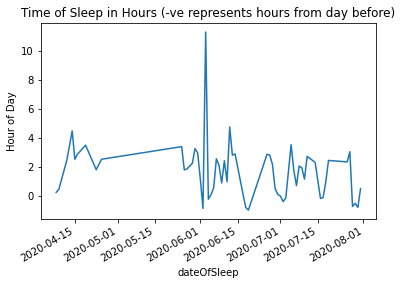

In [49]:
# Check if Start Time is on the same day of DateOfSleep:
check = PERSON2.df_sleep_durations.startTime >= pd.DatetimeIndex(PERSON2.df_sleep_durations.index)

# minus 24h if start time is not the DateOfSleep:
hour_of_sleep = PERSON2.df_sleep_durations[~check].startTime.dt.hour - 24.0
hour_of_sleep = pd.concat([hour_of_sleep,PERSON2.df_sleep_durations[check].startTime.dt.hour])

time_of_sleep = hour_of_sleep.sort_index() + PERSON2.df_sleep_durations.startTime.sort_index().dt.minute / 60.0

time_of_sleep.plot()

plt.title("Time of Sleep in Hours (-ve represents hours from day before)")
plt.ylabel("Hour of Day")

plt.show()

In [50]:
time_of_sleep[time_of_sleep>5]

dateOfSleep
2020-06-03    11.283333
Name: startTime, dtype: float64

Time of Sleep By Months:

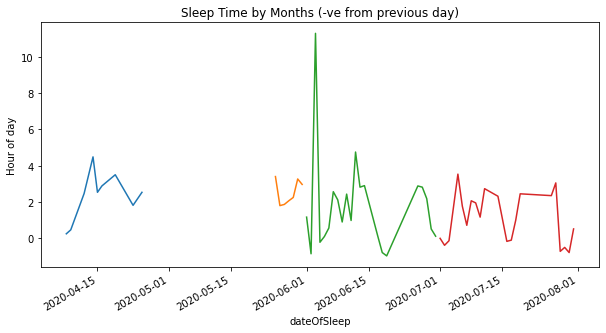

In [51]:
time_grpby_month = PERSON2.df_sleep_durations.sort_index()
time_grpby_month['HourOfSleep'] = time_of_sleep
time_grpby_month = time_grpby_month.groupby('months')

plt.figure(figsize=(10,5))
time_grpby_month['HourOfSleep'].plot()
plt.title("Sleep Time by Months (-ve from previous day)")
plt.ylabel("Hour of day")

plt.show()


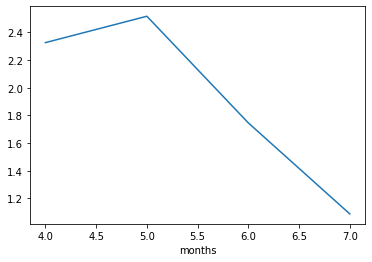

In [52]:
time_grpby_month['HourOfSleep'].mean().plot()

#### Resting Heart Rate

In [53]:
PERSON2.df_resting_hr

,restingHeartRate
dateTime,
2020-04-06,59.0
2020-04-07,58.0
2020-04-08,57.0
2020-04-09,56.0
2020-04-16,54.0
...,...
2020-07-26,56.0
2020-07-27,56.0
2020-07-28,57.0


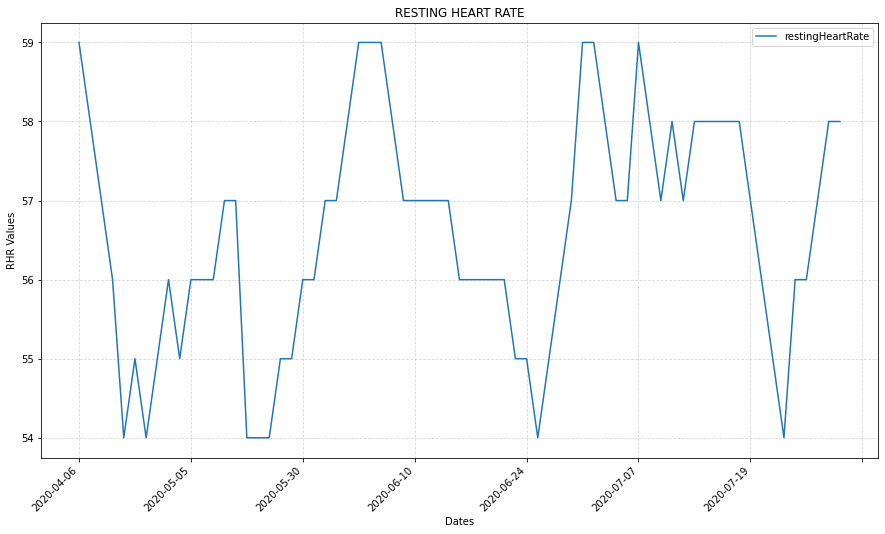

In [54]:
# Plotting Heart Rate and efficiency using df.plot()

PERSON2.df_resting_hr.plot(figsize=(15,8))


plt.grid(True,alpha=0.5,ls='--')
plt.title('RESTING HEART RATE')
plt.xticks(rotation=45,ha='right')
plt.xlabel('Dates')
plt.ylabel('RHR Values')

plt.show()

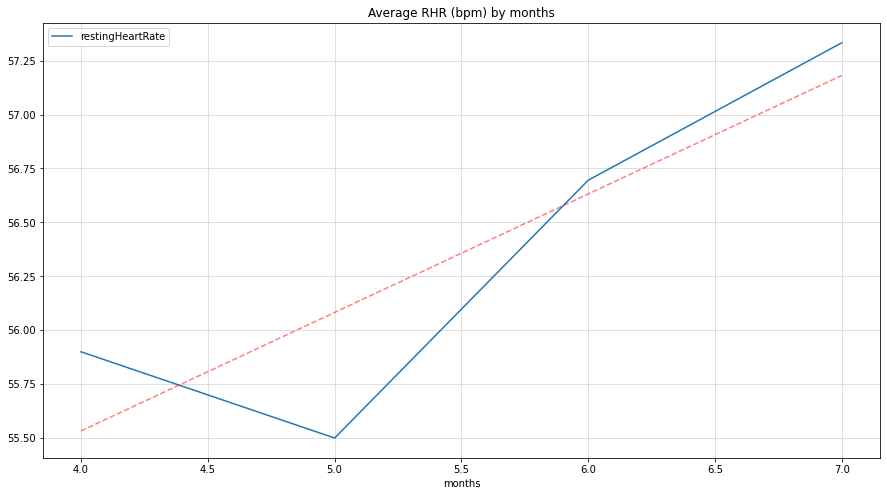

In [55]:
PERSON2.df_resting_hr.index = pd.to_datetime(PERSON2.df_resting_hr.index)

PERSON2.df_resting_hr['months'] = PERSON2.df_resting_hr.index.month

RHR_Mean_Grouped = PERSON2.df_resting_hr.groupby('months').mean()

RHR_Mean_Grouped.plot(figsize=(15,8))

# Linear Regression Fit for trendline:
lm_rhr = lm.LinearRegression()
lm_rhr.fit(RHR_Mean_Grouped.index.to_numpy().reshape(-1, 1),
                  RHR_Mean_Grouped.to_numpy().reshape(-1, 1))
pred_rhr = lm_rhr.predict(RHR_Mean_Grouped.index.to_numpy().reshape(-1, 1))

plt.plot(RHR_Mean_Grouped.index,pred_rhr,'--r',alpha=0.5)

plt.title('Average RHR (bpm) by months')

plt.grid(':',alpha=0.5)

plt.show()

From the linear trendline above, RHR increases from FEB to JUL. The RHR goes up and down. however, compared to other indicatiors like calories, MAY was also significantly higher than the rest of the months. The RHR is different from PERSON1 (with PERSON1: 58 to 61, PERSON2: 55.5 to 57.2).

In [56]:
# Viewing the number of records in each month:

PERSON2.df_resting_hr.groupby('months').count()

,restingHeartRate
months,
4,10
5,12
6,23
7,24


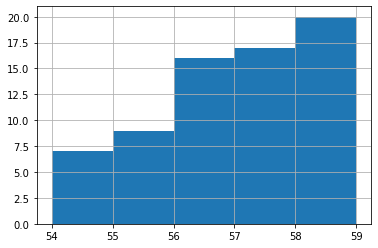

In [57]:
# DISTRIBUTION OF RHR:

PERSON2.df_resting_hr.restingHeartRate.hist(bins=5)
plt.show()

### Steps Activity and RHR relationship

In [58]:
PERSON2.df_activity_steps

,step_count,month,m_num
dateTime,,,
2020-04-05,2233,4,April
2020-04-06,8208,4,April
2020-04-07,6070,4,April
2020-04-08,9494,4,April
2020-04-09,4849,4,April
...,...,...,...
2020-07-27,5686,7,July
2020-07-28,4282,7,July
2020-07-29,7370,7,July


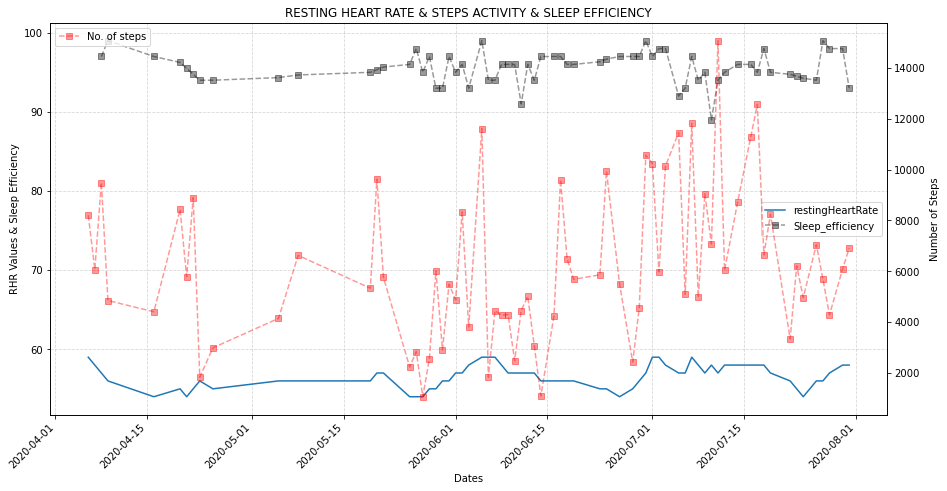

In [59]:
# Plotting RHR and Sleep Efficiency time series using df.plot()

PERSON2.df_resting_hr.restingHeartRate.plot(figsize=(15,8))

plt.plot(PERSON2.df_sleep_durations.reindex(PERSON2.df_resting_hr.index).index,
         PERSON2.df_sleep_durations.reindex(PERSON2.df_resting_hr.index).interpolate().sleep_efficiency, 
         '--sk', alpha=0.4,label='Sleep_efficiency')
plt.legend()
plt.grid(True,alpha=0.5,ls='--')
plt.title('RESTING HEART RATE & STEPS ACTIVITY & SLEEP EFFICIENCY')
plt.xticks(rotation=45,ha='right')
plt.xlabel('Dates')
plt.ylabel('RHR Values & Sleep Efficiency')

ax2 = plt.twinx() # Create another axis to display Steps Data for additional comparison
ax2.set_ylabel('Number of Steps')
ax2.plot(PERSON2.df_activity_steps.reindex(PERSON2.df_resting_hr.index).index,
         PERSON2.df_activity_steps.reindex(PERSON2.df_resting_hr.index).interpolate().step_count, 
         '--sr', alpha=0.4,label='No. of steps')
ax2.legend(loc='upper left')

plt.show()

### Heart Rate Variability

In [60]:
PERSON2.df_hrv_stats_full_day

,Max_PP_interval,Min_PP_interval,SD_PP_interval,Mean_PP_interval,PP_interval_range,SD_PP_5min,RMS_PP_diff,Max_PP_1st_dydt,SD_PP_1st_dydt,Max_PP_2nd_dydt,SD_PP_2nd_dydt
date,,,,,,,,,,,
2020-04-08,1363.636364,357.142857,177.634318,926.929113,1006.493506,170.298670,18.543749,56.680162,3.226561,11.336032,0.641768
2020-04-19,1428.571429,759.493671,177.886429,976.378766,669.077758,172.862153,18.936038,46.451613,3.508955,9.290323,0.683171
2020-04-23,1333.333333,304.568528,134.947045,1021.203943,1028.764805,127.862328,18.644547,54.421769,3.378597,10.884354,0.651528
2020-04-24,1463.414634,292.682927,231.299563,666.218883,1170.731707,223.255921,18.355795,54.728370,3.132521,10.945674,0.648022
2020-04-25,1428.571429,377.358491,212.062484,984.796456,1051.212938,206.373552,22.400786,53.798257,3.770579,9.364063,0.763926
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,1224.489796,405.405405,144.380578,875.621372,819.084391,135.990810,17.399029,47.965116,2.973053,9.285714,0.590291
2020-07-28,1304.347826,540.540541,146.731985,960.120183,763.807286,138.823238,18.900641,70.033670,3.312163,13.256617,0.667132
2020-07-29,1224.489796,468.750000,158.327652,839.728338,755.739796,152.504730,15.970956,53.864169,2.769679,10.772834,0.542198


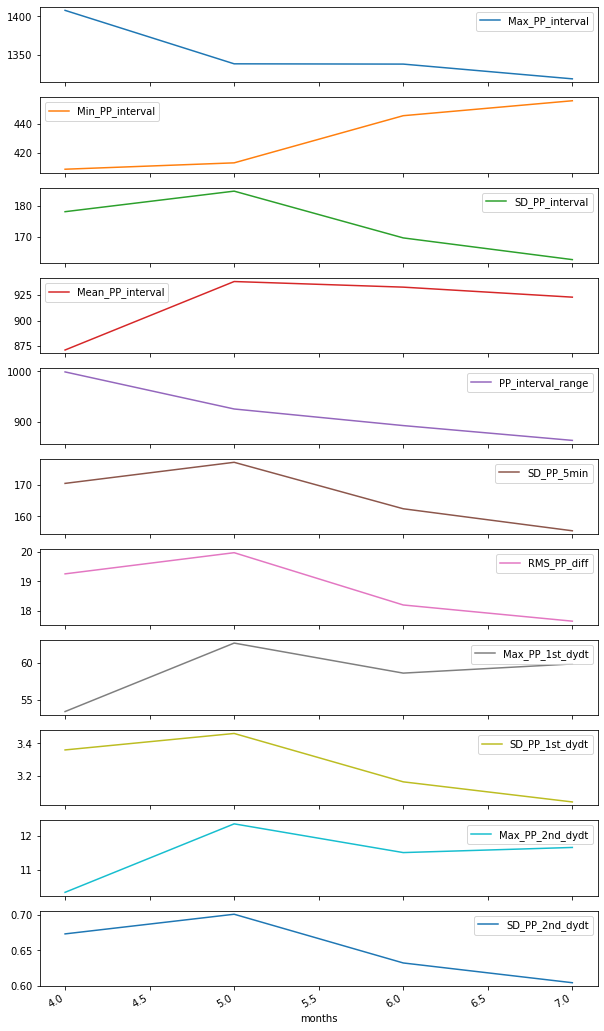

In [61]:
# SPLITTING INTO MONTHS for HRV of full day records:

PERSON2.df_hrv_stats_full_day.index = pd.to_datetime(PERSON2.df_hrv_stats_full_day.index)

PERSON2.df_hrv_stats_full_day['months'] = PERSON2.df_hrv_stats_full_day.index.month

HRV_Mean_Grouped = PERSON2.df_hrv_stats_full_day.groupby('months').mean()

HRV_Mean_Grouped.plot(figsize=(10,20),subplots=True)

plt.show()

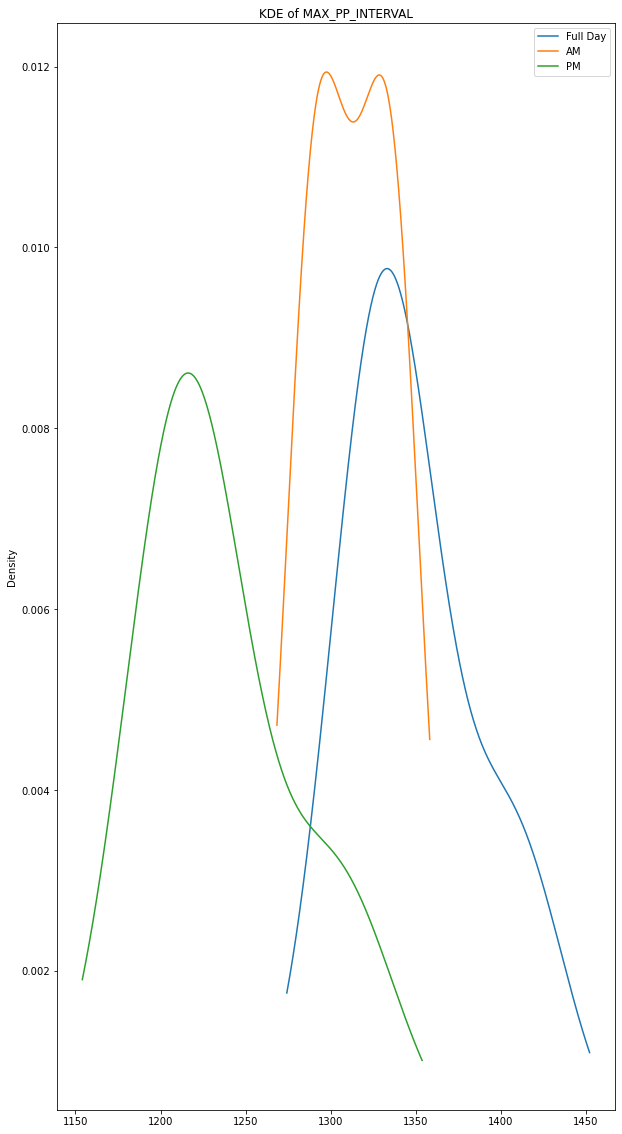

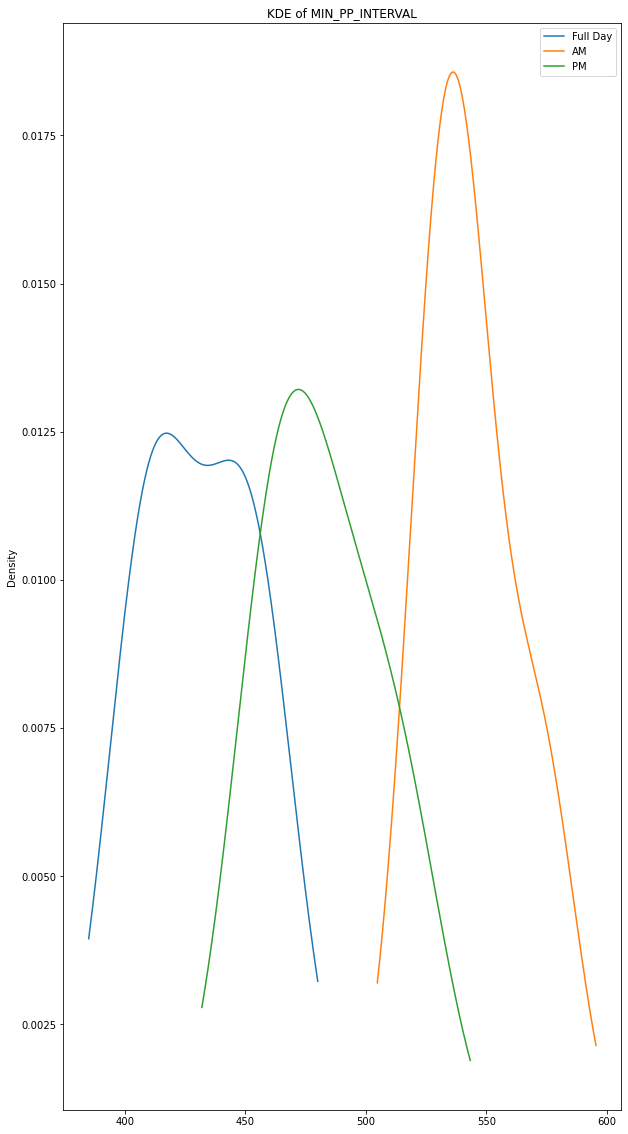

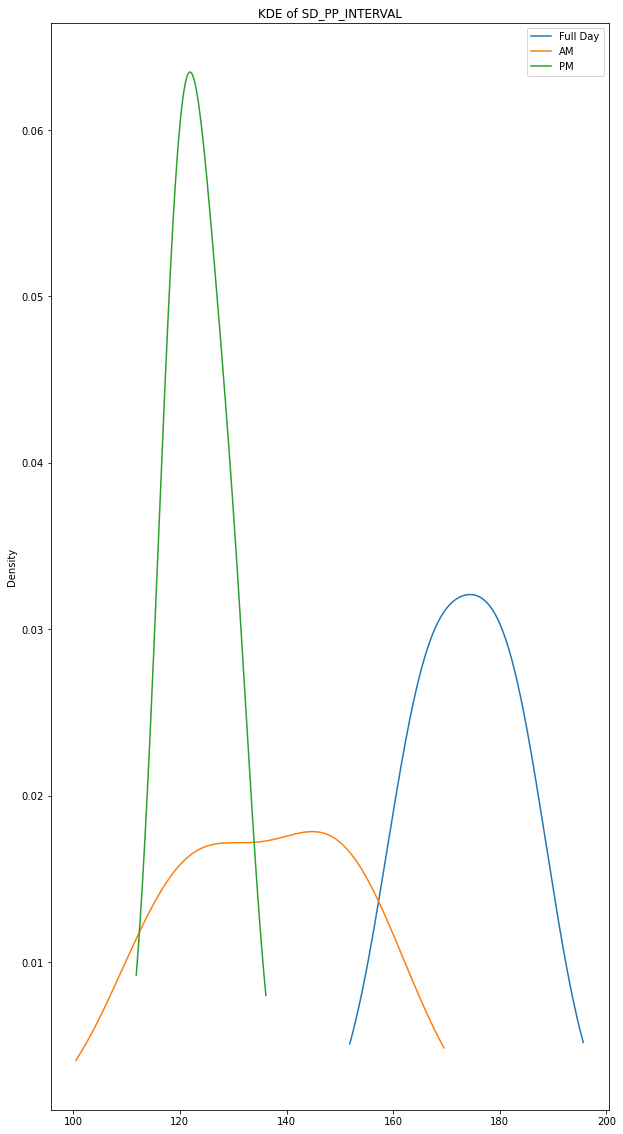

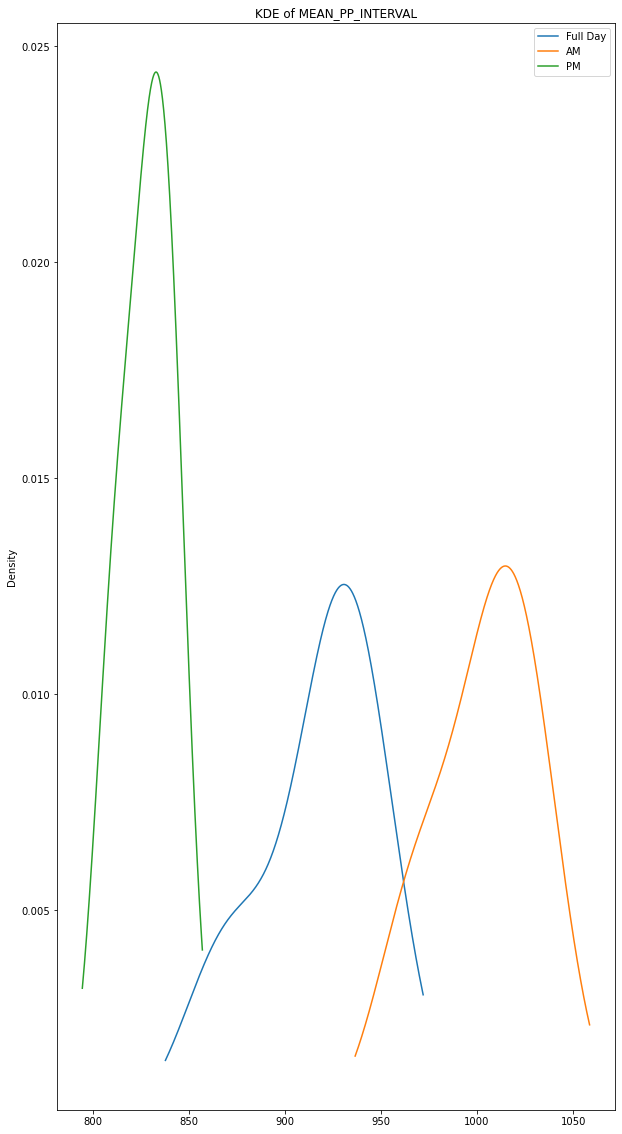

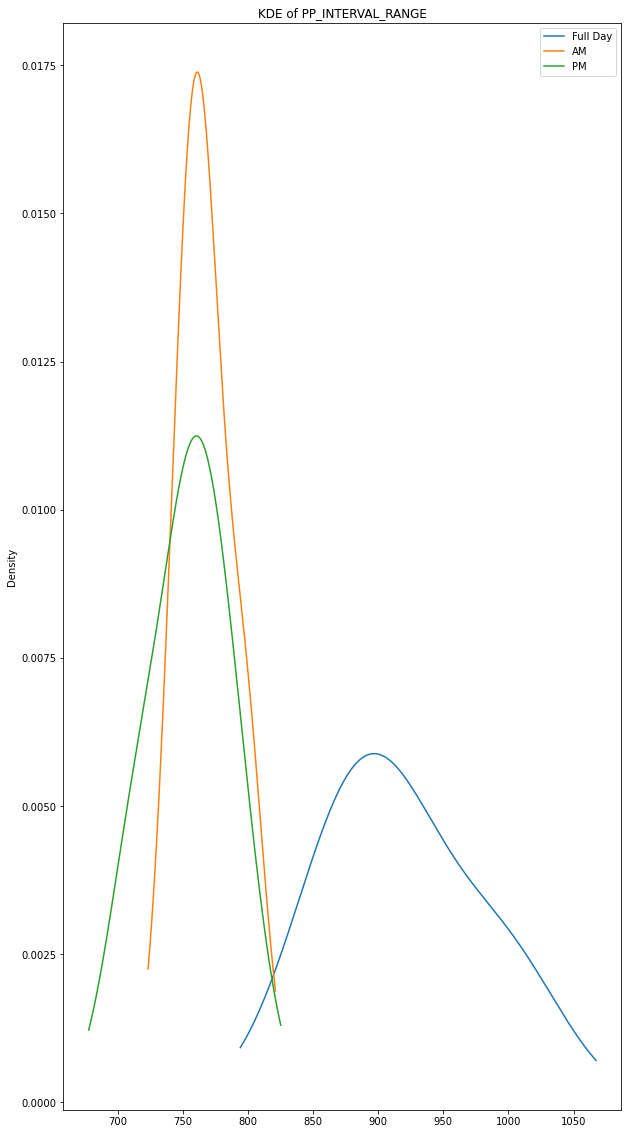

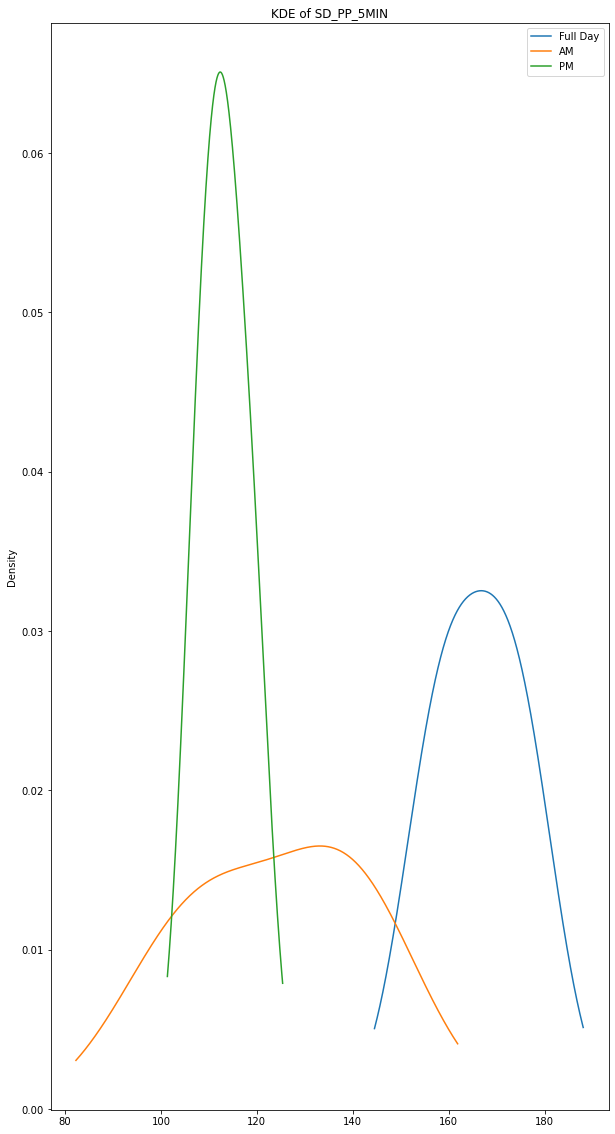

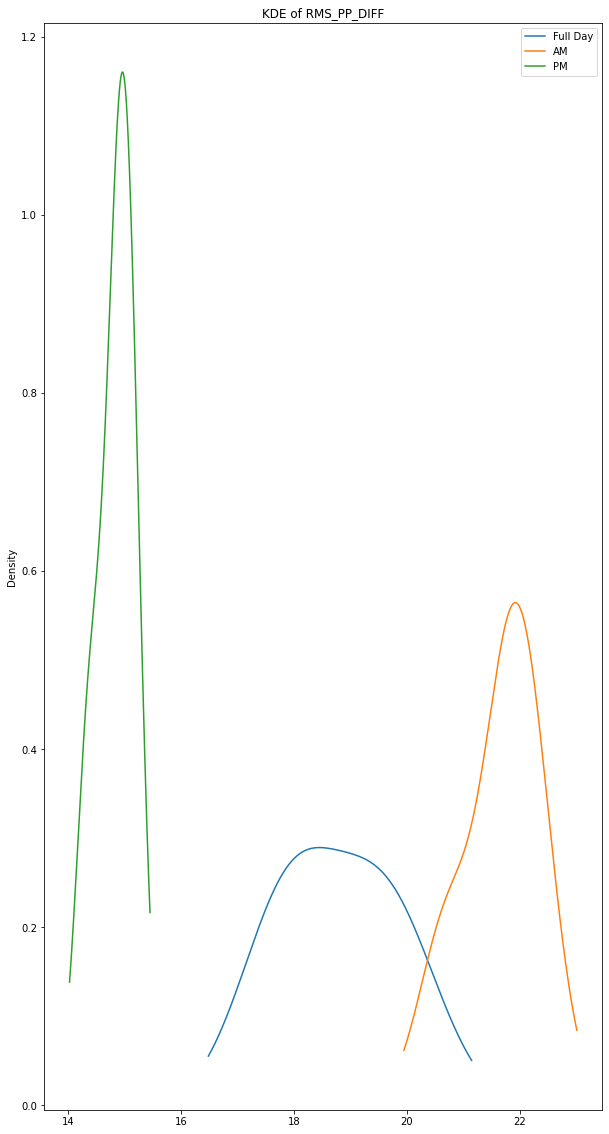

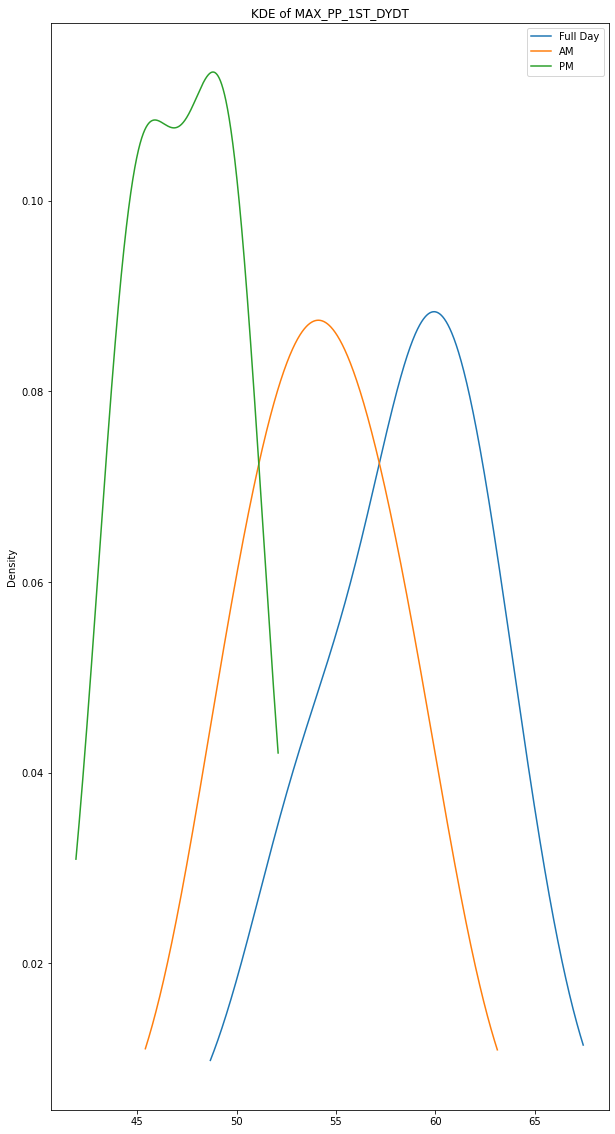

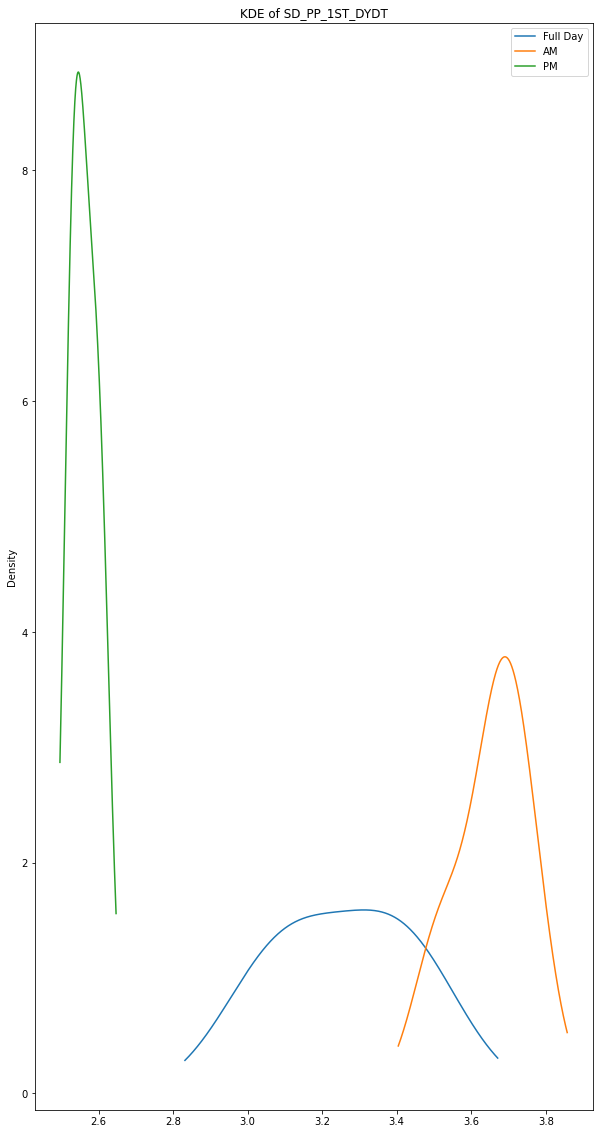

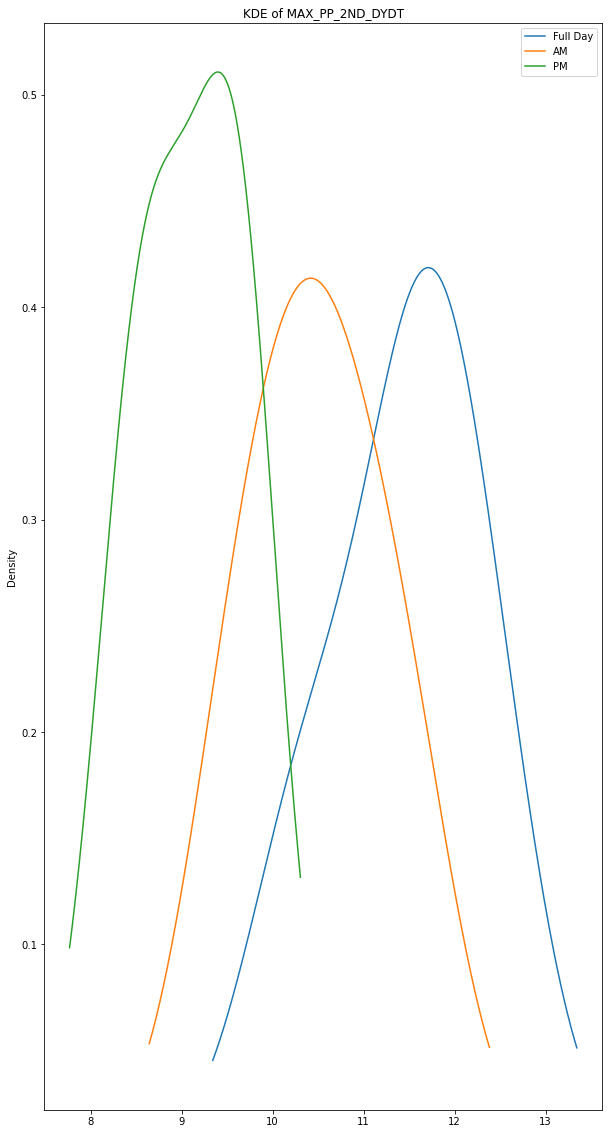

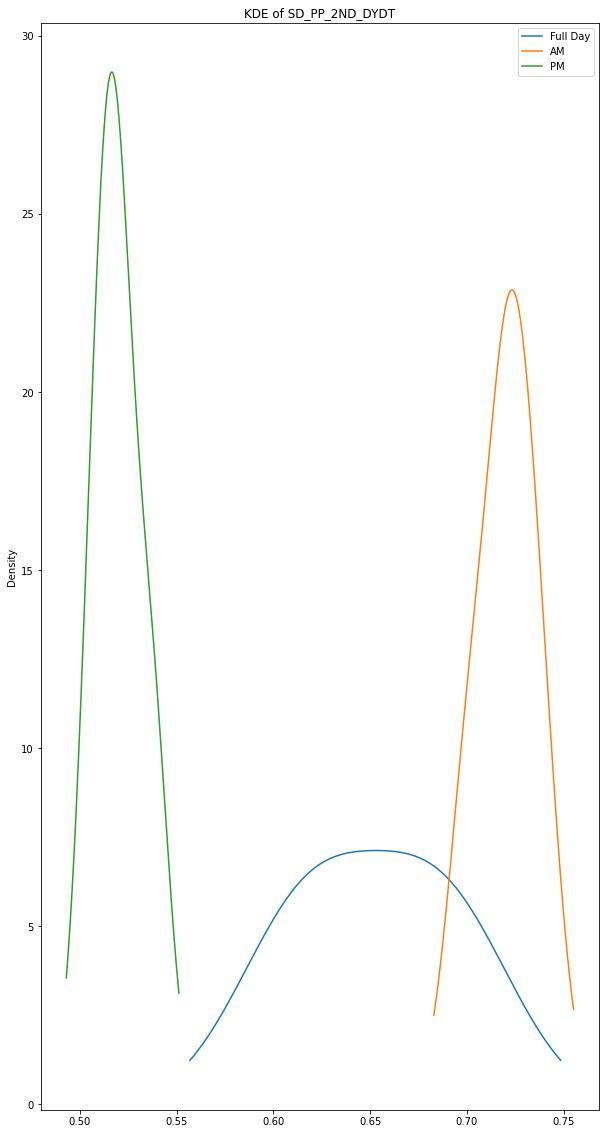

In [62]:
# SPLITTING INTO MONTHS for HRV of AM and PM half-day records:

PERSON2.df_hrv_stats_AM.index = pd.to_datetime(PERSON2.df_hrv_stats_AM.index)
PERSON2.df_hrv_stats_PM.index = pd.to_datetime(PERSON2.df_hrv_stats_PM.index)

PERSON2.df_hrv_stats_AM['months'] = PERSON2.df_hrv_stats_AM.index.month
PERSON2.df_hrv_stats_PM['months'] = PERSON2.df_hrv_stats_PM.index.month

HRV_AM_Mean_Grouped = PERSON2.df_hrv_stats_AM.groupby('months').mean()
HRV_PM_Mean_Grouped = PERSON2.df_hrv_stats_PM.groupby('months').mean()

for col_y in PERSON2.df_hrv_stats_AM.columns[0:-1]:
    plt.figure(figsize=(20,5))
    HRV_Mean_Grouped[col_y].plot(kind='kde',figsize=(10,20),label="Full Day") # plotting together for comparison
    HRV_AM_Mean_Grouped[col_y].plot(kind='kde',figsize=(10,20),label="AM")
    HRV_PM_Mean_Grouped[col_y].plot(kind='kde',figsize=(10,20),label="PM")
    plt.title("KDE of "+col_y.upper())
    plt.legend()
    
plt.show()

### Comparing RHR / Sleep Duration / Calories when peak minutes are zero VS Where there are peak minutes

When peak minutes or cardio minutes are not present, there is a high chance that user was not exercising/aerobic activities (Jogging, running, etc) for that particular day. Thus, comparison of the two groups of data might be meaningful to see the effect on RHR.

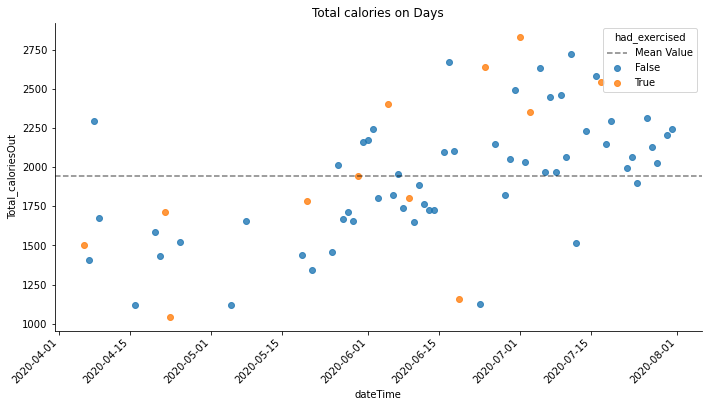

In [63]:
# Finding Days when peak minutes or cardio minutes are not present

mask = (PERSON2.df_hr_calories.minutes_Cardio != 0) & (PERSON2.df_hr_calories.minutes_Peak != 0)

PERSON2.df_hr_calories['had_exercised'] = mask

# Plot out to see the diff of total calories:
sns.lmplot('dateTime','Total_caloriesOut',data=PERSON2.df_hr_calories.reset_index(),
           fit_reg=False,hue='had_exercised',aspect=2,legend=False)

plt.axhline(PERSON2.df_hr_calories.Total_caloriesOut.mean(),linestyle='--',
            label='Mean Value',color='k',alpha=0.5)

plt.xticks(rotation=45,ha='right')
plt.title('Total calories on Days')
plt.legend(title='had_exercised')
plt.show()


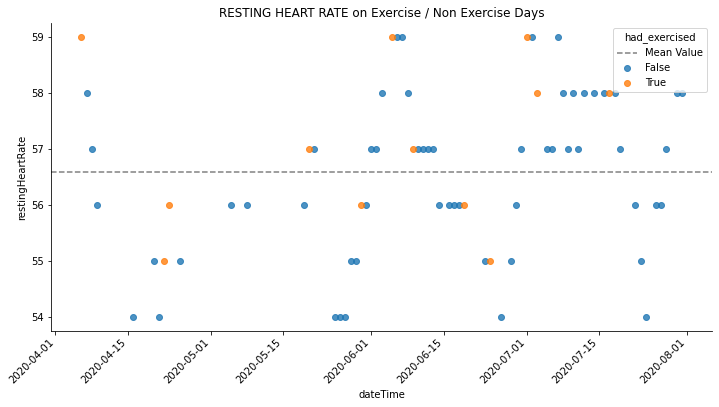

In [64]:
# Plot out to see the Diff in RHR:
combi_1 = PERSON2.df_resting_hr.restingHeartRate
combi_2 = PERSON2.df_hr_calories.had_exercised.reindex(combi_1.index) # re-index to follow RHR df records

DATA = pd.concat([combi_1,combi_2],axis=1).dropna().reset_index()

sns.lmplot('dateTime','restingHeartRate',data=DATA,
               fit_reg=False,hue='had_exercised',aspect=2,legend=False)

plt.axhline(PERSON2.df_resting_hr.restingHeartRate.mean(),linestyle='--',
            label='Mean Value',color='k',alpha=0.5)

plt.xticks(rotation=45,ha='right')
plt.title('RESTING HEART RATE on Exercise / Non Exercise Days')
plt.legend(title='had_exercised')
plt.show()


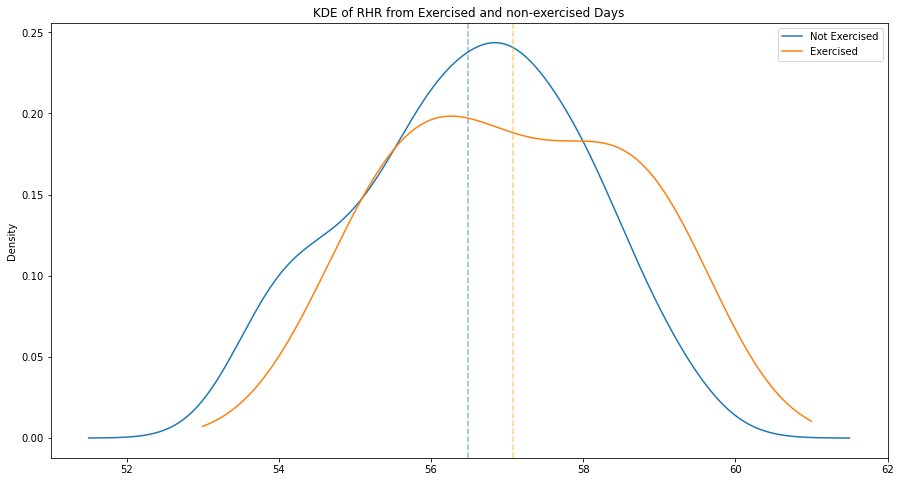

In [65]:
# Comparing the RHR (Exercised VS non-exercise) using above DATA:

plt.figure(figsize=(15,8))

DATA[DATA.had_exercised == False].restingHeartRate.plot(kind='kde',label='Not Exercised')
DATA[DATA.had_exercised == True].restingHeartRate.plot(kind='kde',label='Exercised')

plt.axvline(DATA[DATA.had_exercised == False].restingHeartRate.mean(),ls='--',alpha=0.5)
plt.axvline(DATA[DATA.had_exercised == True].restingHeartRate.mean(),c='orange',ls='--',alpha=0.5)

plt.legend()
plt.title("KDE of RHR from Exercised and non-exercised Days")
plt.show()

There was no significance difference for RHR having exercised or not. The mean RHR is a bit higher for Non-exercised days than exercised days. unlike PERSON1. Maybe due to lesser records for exercise.

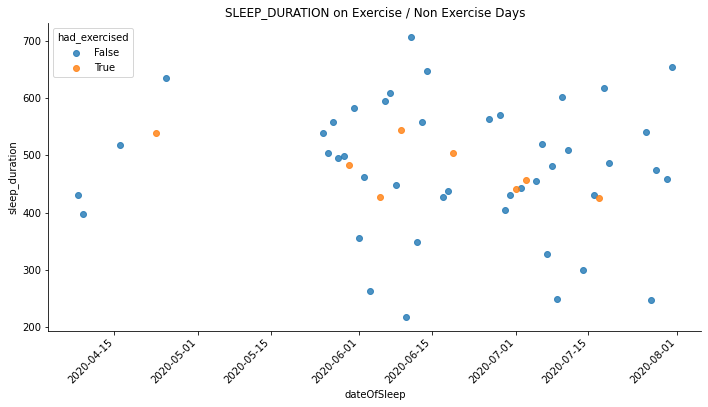

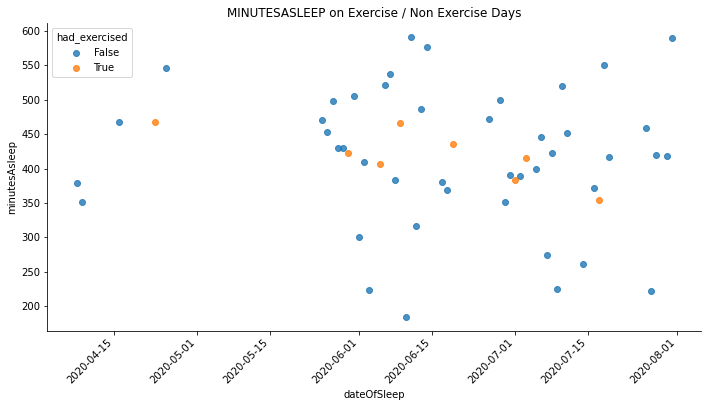

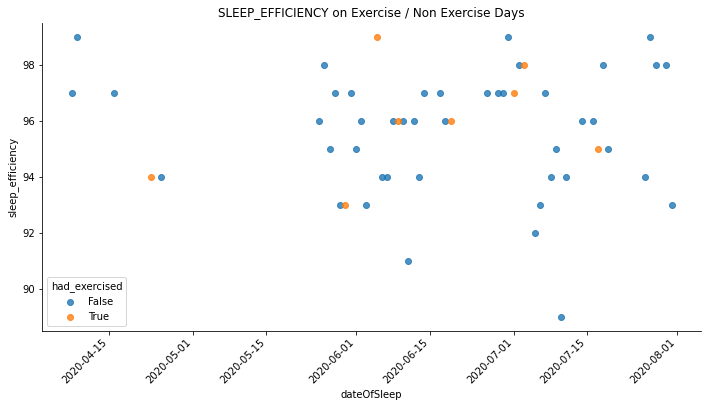

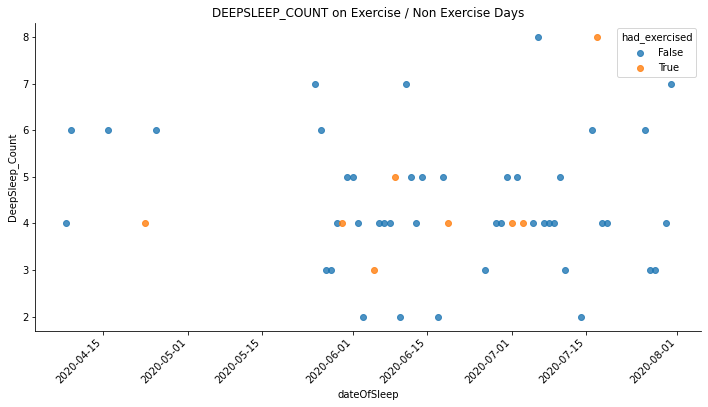

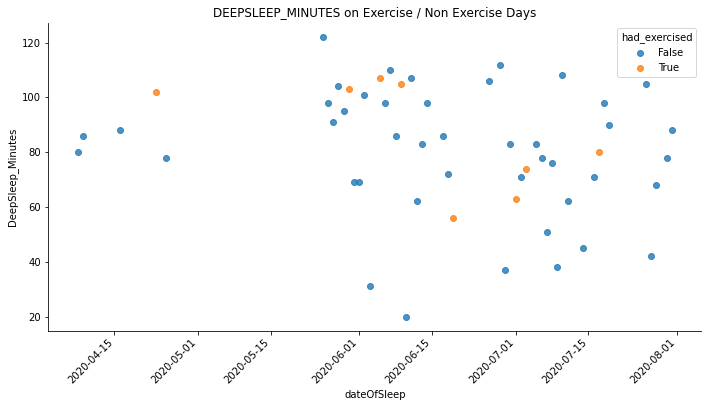

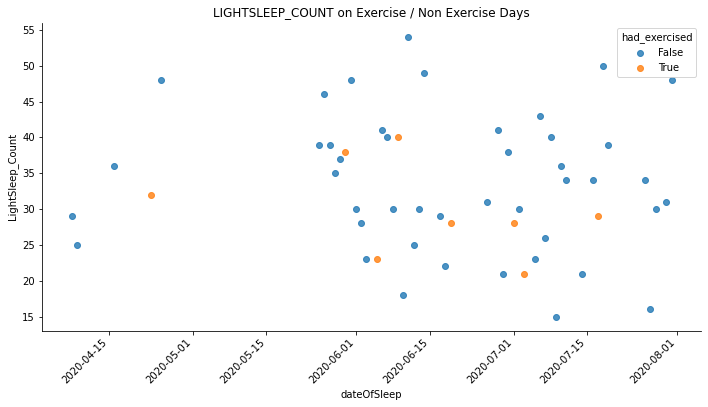

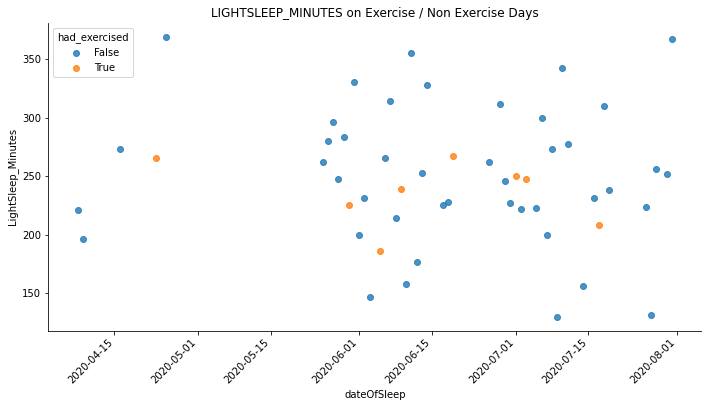

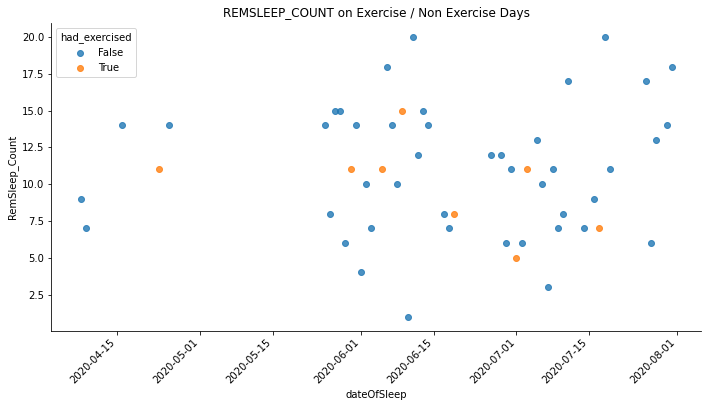

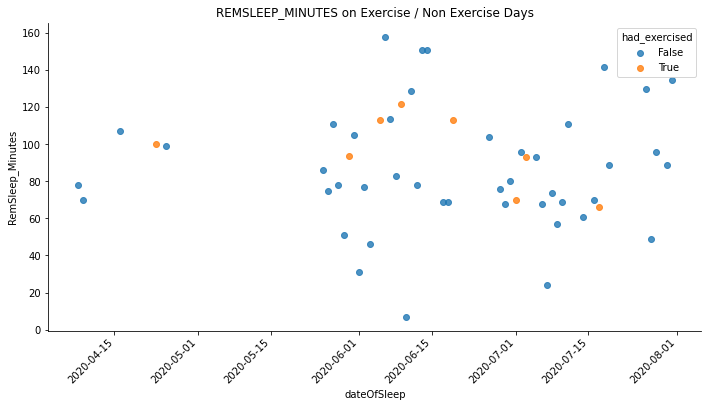

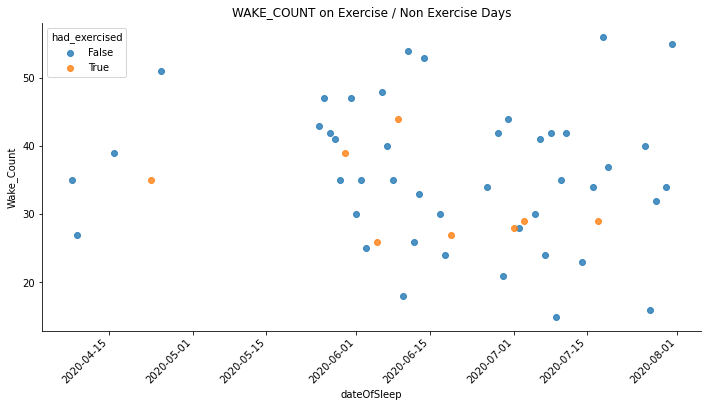

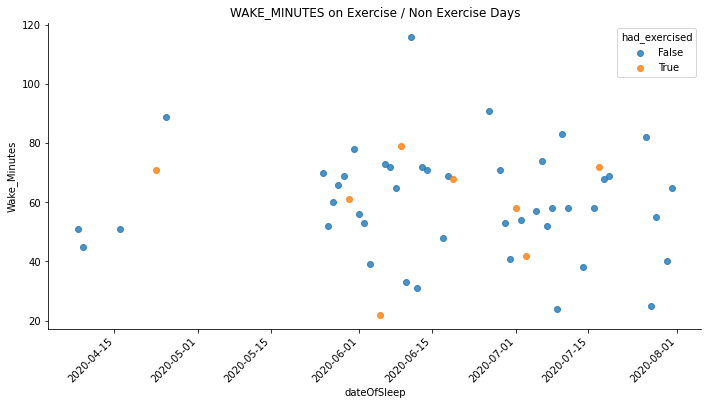

In [66]:
# Plot out to see the Diff in Sleep:

combi_1 = PERSON2.df_sleep_durations[[x for x in PERSON2.df_sleep_durations if "time" not in x.lower() and "month" not in x.lower()]]
combi_2 = PERSON2.df_hr_calories.had_exercised.reindex(combi_1.index)

DATA = pd.concat([combi_1,combi_2],axis=1).dropna().reset_index()

for col_y in combi_1.columns:
    sns.lmplot('dateOfSleep',col_y,data=DATA,
                   fit_reg=False,hue='had_exercised',aspect=2,legend=False)
    
    plt.xticks(rotation=45,ha='right')
    plt.title(col_y.upper() + ' on Exercise / Non Exercise Days')
    plt.legend(title='had_exercised')
    
plt.show()



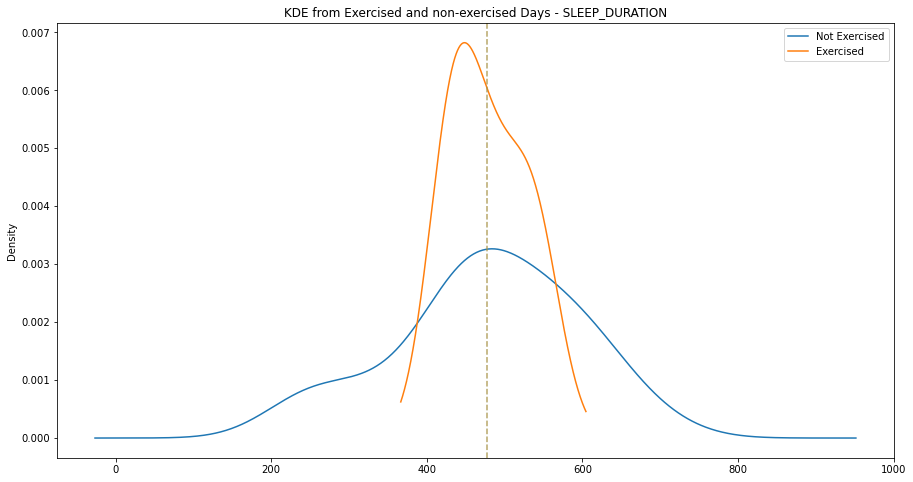

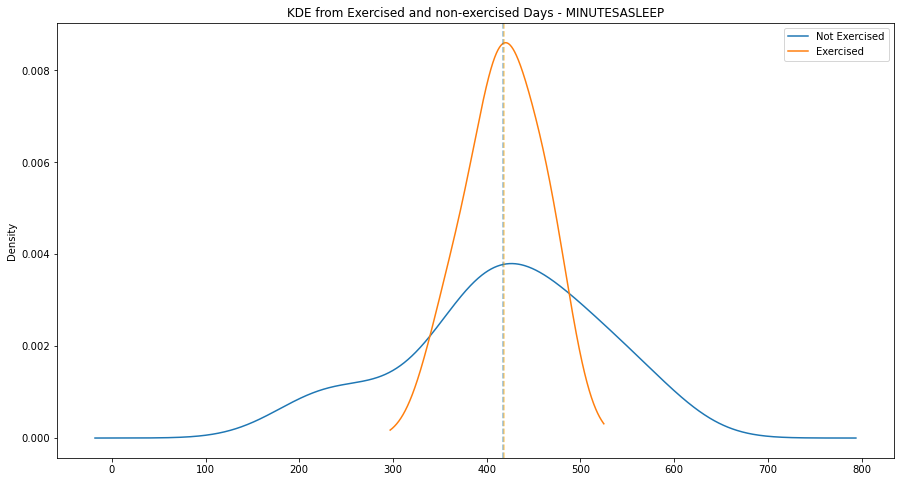

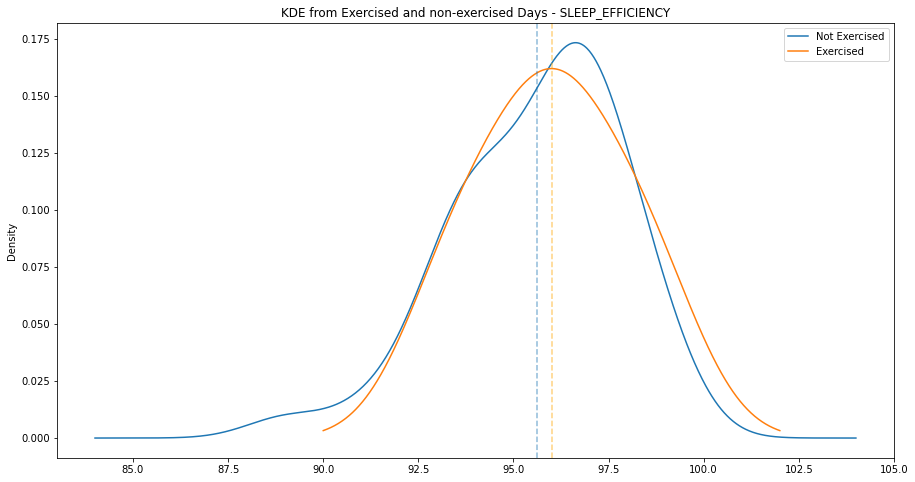

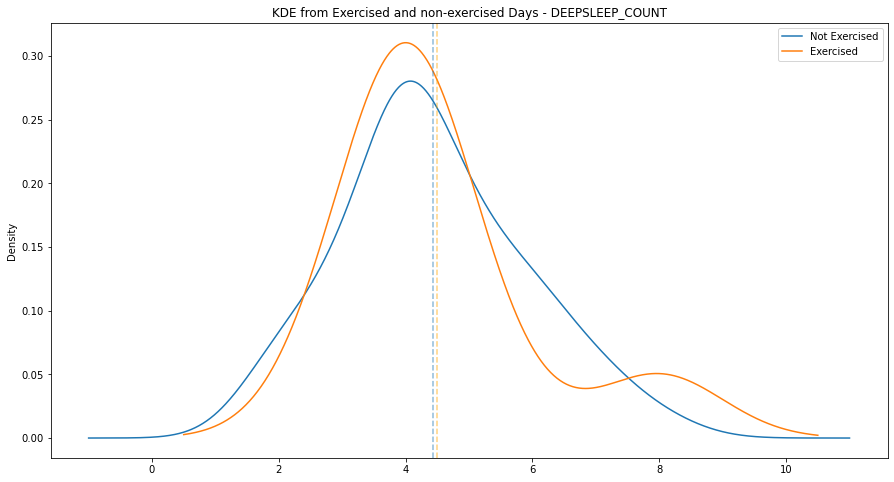

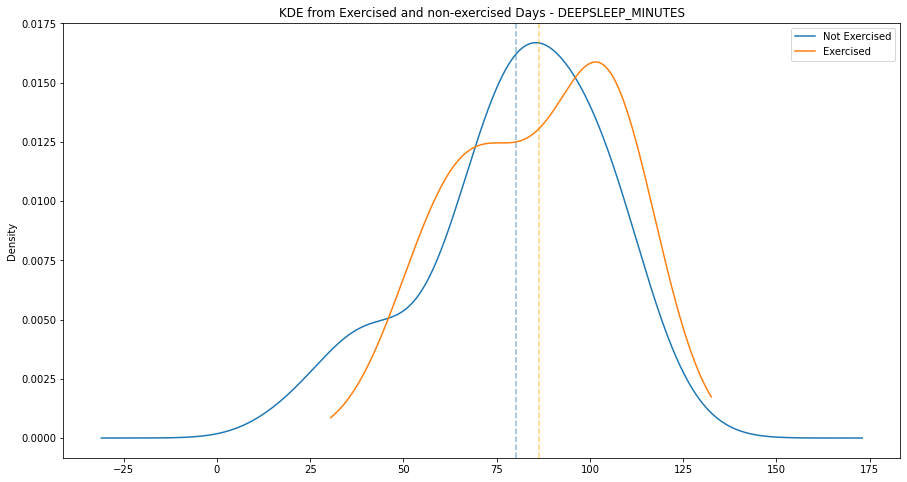

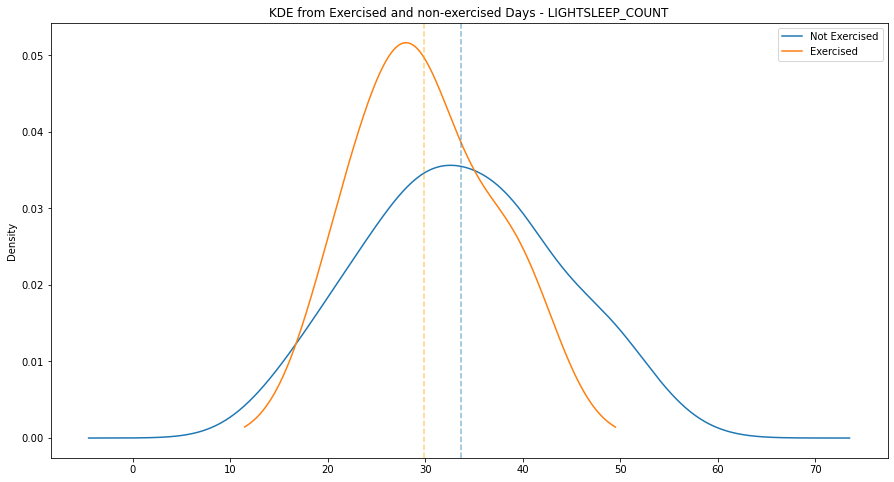

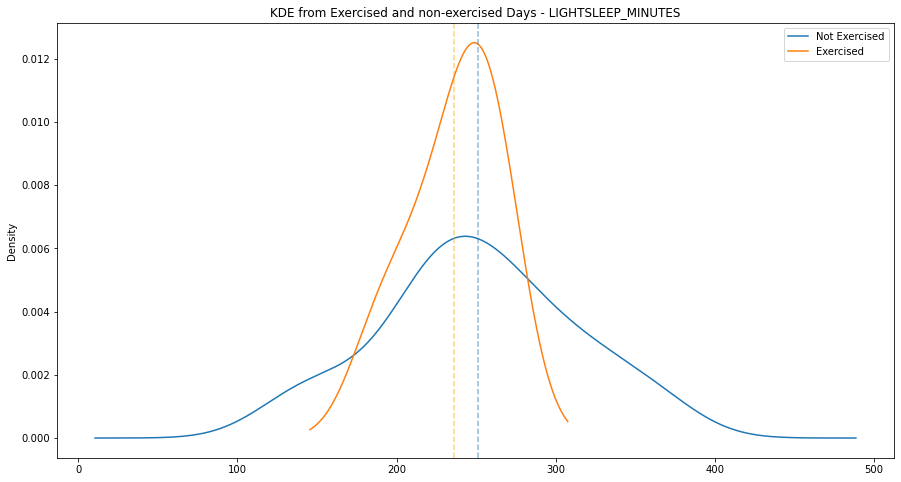

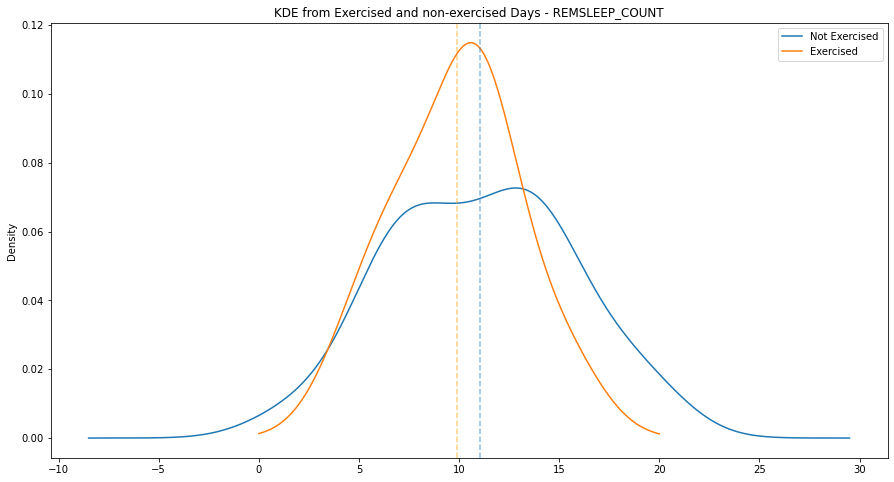

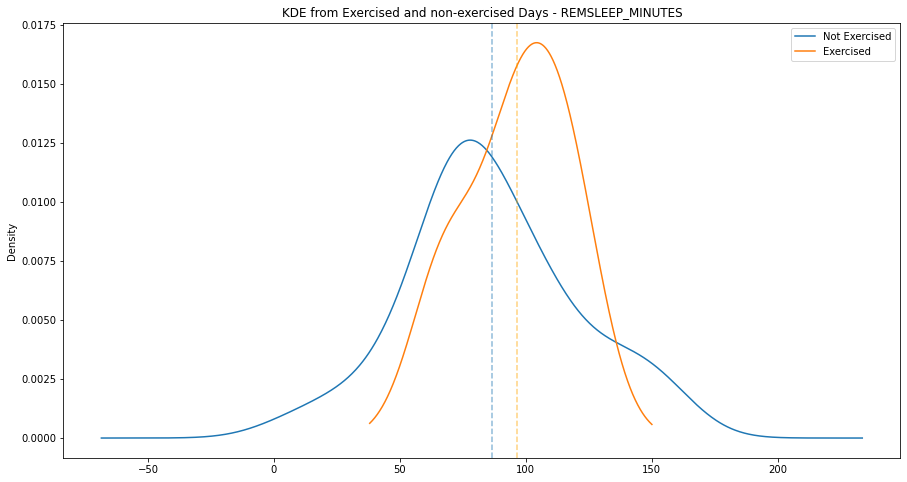

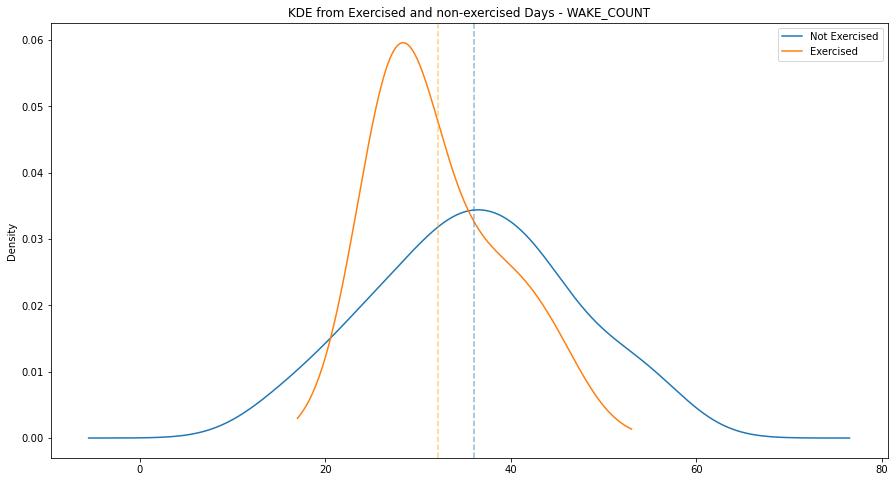

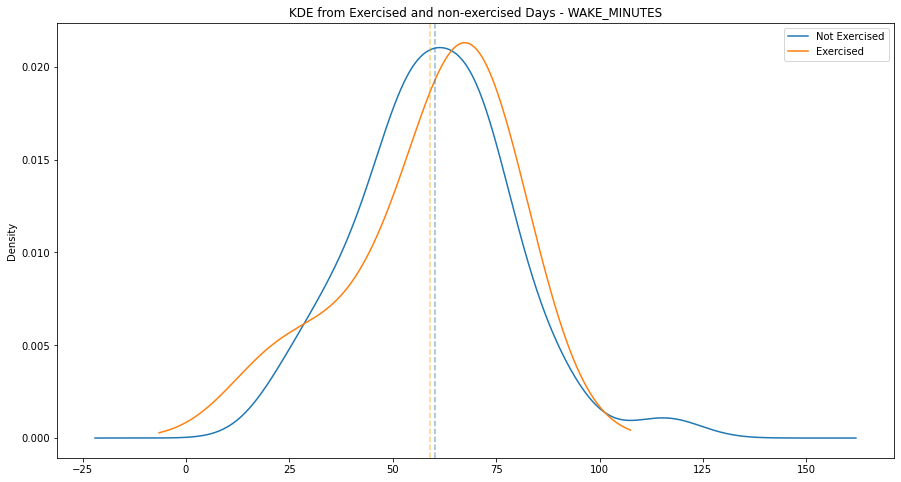

In [67]:
# Comparing Exercised VS non-exercise using above DATA:

for col_y in combi_1.columns:
    plt.figure(figsize=(15,8))
    DATA[DATA.had_exercised == False][col_y].plot(kind='kde',label='Not Exercised')
    DATA[DATA.had_exercised == True][col_y].plot(kind='kde',label='Exercised')

    plt.axvline(DATA[DATA.had_exercised == False][col_y].mean(),ls='--',alpha=0.5)
    plt.axvline(DATA[DATA.had_exercised == True][col_y].mean(),c='orange',ls='--',alpha=0.5)

    plt.legend()
    plt.title("KDE from Exercised and non-exercised Days - " + col_y.upper())
plt.show()

From the above comparison, there was no conclusive observations that having more active days affected the Sleep statistics and sleep efficiency. However, it seems there were more deep and REM sleep, lesser wake counts but longer wake durations.